In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
str_results = pd.read_csv("../04_structural_models/structural_model_resultsv4.csv")
img_results = pd.read_csv("../05_cellpainting_models/cellpainting_model_resultsv4.csv")

#remove this line when Cell Painting results available
#img_results = str_results

In [9]:
str_results

Unnamed: 0  CV_AUC_mean  CV_AUC_std  Held_out_TP  \
0        BSK_3C_Proliferation_down     0.664859    0.086753         15.0   
1    APR_HepG2_StressKinase_72h_up     0.628462    0.043698          1.0   
2        APR_HepG2_MitoMass_72h_up     0.652571    0.156117          0.0   
3                 ATG_STAT3_CIS_dn     0.624766    0.083601          1.0   
4          ACEA_T47D_80hr_Negative     0.687278    0.024615         13.0   
..                             ...          ...         ...          ...   
366                  NR-PPAR-gamma     0.775572    0.068542          3.0   
367                         SR-p53     0.813979    0.043851         21.0   
368                          NR-ER     0.666495    0.021878         17.0   
369                     HIV_active     0.595990    0.106143          1.0   
370         DILIst Classification      0.624105    0.040883         81.0   

     Held_out_TN  Held_out_FP  Held_out_FN  Held_out_BA  Held_out_AUC  \
0           35.0          5.0         14.0     0.696121      0.737931   
1           40.0          9.0          6.0     0.479592      0.588921   
2           47.0          3.0          5.0     0.470000      0.668000   
3          133.0          2.0          3.0     0.617593      0.697222   
4           40.0         21.0         10.0     0.610478      0.663934   
..           ...          ...          ...          ...           ...   
366        364.0          3.0          9.0     0.620913      0.781108   
367        312.0         56.0         17.0     0.700229      0.775458   
368        261.0         56.0         39.0     0.563458      0.577034   
369        163.0          4.0          6.0     0.559453      0.784431   
370         39.0         26.0         29.0     0.668182      0.703497   

     Held_out_MCC  Held_out_AUCPR  Held_out_Specificity  Held_out_Sensitivity  
0        0.426746        0.678237              0.875000              0.517241  
1       -0.035245        0.174390              0.816327              0.142857  
2       -0.075955        0.157351              0.940000              0.000000  
3        0.270568        0.366442              0.985185              0.250000  
4        0.200728        0.415101              0.655738              0.565217  
..            ...             ...                   ...                   ...  
366      0.339231        0.319800              0.991826              0.250000  
367      0.297529        0.367330              0.847826              0.552632  
368      0.114266        0.346939              0.823344              0.303571  
369      0.139855        0.211701              0.976048              0.142857  
370      0.333438        0.778469              0.600000              0.736364  

[371 rows x 13 columns]

In [10]:
str_results = str_results.rename(columns={"Unnamed: 0": "endpoint"})
str_results

endpoint  CV_AUC_mean  CV_AUC_std  Held_out_TP  \
0        BSK_3C_Proliferation_down     0.664859    0.086753         15.0   
1    APR_HepG2_StressKinase_72h_up     0.628462    0.043698          1.0   
2        APR_HepG2_MitoMass_72h_up     0.652571    0.156117          0.0   
3                 ATG_STAT3_CIS_dn     0.624766    0.083601          1.0   
4          ACEA_T47D_80hr_Negative     0.687278    0.024615         13.0   
..                             ...          ...         ...          ...   
366                  NR-PPAR-gamma     0.775572    0.068542          3.0   
367                         SR-p53     0.813979    0.043851         21.0   
368                          NR-ER     0.666495    0.021878         17.0   
369                     HIV_active     0.595990    0.106143          1.0   
370         DILIst Classification      0.624105    0.040883         81.0   

     Held_out_TN  Held_out_FP  Held_out_FN  Held_out_BA  Held_out_AUC  \
0           35.0          5.0         14.0     0.696121      0.737931   
1           40.0          9.0          6.0     0.479592      0.588921   
2           47.0          3.0          5.0     0.470000      0.668000   
3          133.0          2.0          3.0     0.617593      0.697222   
4           40.0         21.0         10.0     0.610478      0.663934   
..           ...          ...          ...          ...           ...   
366        364.0          3.0          9.0     0.620913      0.781108   
367        312.0         56.0         17.0     0.700229      0.775458   
368        261.0         56.0         39.0     0.563458      0.577034   
369        163.0          4.0          6.0     0.559453      0.784431   
370         39.0         26.0         29.0     0.668182      0.703497   

     Held_out_MCC  Held_out_AUCPR  Held_out_Specificity  Held_out_Sensitivity  
0        0.426746        0.678237              0.875000              0.517241  
1       -0.035245        0.174390              0.816327              0.142857  
2       -0.075955        0.157351              0.940000              0.000000  
3        0.270568        0.366442              0.985185              0.250000  
4        0.200728        0.415101              0.655738              0.565217  
..            ...             ...                   ...                   ...  
366      0.339231        0.319800              0.991826              0.250000  
367      0.297529        0.367330              0.847826              0.552632  
368      0.114266        0.346939              0.823344              0.303571  
369      0.139855        0.211701              0.976048              0.142857  
370      0.333438        0.778469              0.600000              0.736364  

[371 rows x 13 columns]

In [11]:
img_results = img_results.rename(columns={"Unnamed: 0": "endpoint"})
img_results

endpoint  CV_AUC_mean  CV_AUC_std  Held_out_TP  \
0    TOX21_HSE_BLA_agonist_viability     0.720905    0.083264          0.0   
1               TOX21_p53_BLA_p1_ch2     0.768766    0.051949         20.0   
2            CEETOX_H295R_11DCORT_dn     0.609273    0.066309          3.0   
3          Tanguay_ZF_120hpf_MORT_up     0.750162    0.097273          1.0   
4                  BSK_SAg_CD69_down     0.645474    0.091759          7.0   
..                               ...          ...         ...          ...   
366                           SR-p53     0.793000    0.025194         11.0   
367                            NR-ER     0.586018    0.040739          3.0   
368                        NR-ER-LBD     0.507956    0.033555          0.0   
369                       HIV_active     0.411586    0.142020          0.0   
370           DILIst Classification      0.561398    0.061990         59.0   

     Held_out_TN  Held_out_FP  Held_out_FN  Held_out_BA  Held_out_AUC  \
0          398.0          0.0          9.0     0.500000      0.733250   
1          431.0          8.0         20.0     0.740888      0.786503   
2            8.0          6.0         10.0     0.401099      0.351648   
3           50.0          0.0          6.0     0.571429      0.720000   
4           48.0          2.0         12.0     0.664211      0.678947   
..           ...          ...          ...          ...           ...   
366        366.0          2.0         27.0     0.642019      0.786613   
367        308.0          9.0         53.0     0.512590      0.524335   
368        389.0          0.0         27.0     0.500000      0.669523   
369        167.0          0.0          7.0     0.500000      0.419162   
370         40.0         25.0         51.0     0.575874      0.604476   

     Held_out_MCC  Held_out_AUCPR  Held_out_Specificity  Held_out_Sensitivity  
0        0.000000        0.266089              1.000000              0.000000  
1        0.568121        0.563102              0.981777              0.500000  
2       -0.209657        0.423258              0.571429              0.230769  
3        0.357143        0.332620              1.000000              0.142857  
4        0.435608        0.611231              0.960000              0.368421  
..            ...             ...                   ...                   ...  
366      0.469922        0.498744              0.994565              0.289474  
367      0.050973        0.186554              0.971609              0.053571  
368      0.000000        0.152095              1.000000              0.000000  
369      0.000000        0.042528              1.000000              0.000000  
370      0.146763        0.671933              0.615385              0.536364  

[371 rows x 13 columns]

In [12]:
# Rename columns with 'atr_' and 'img_'
str_results = str_results.rename(columns=lambda x: 'str_' + x if x != str_results.columns[0] else x)
img_results = img_results.rename(columns=lambda x: 'img_' + x if x != img_results.columns[0] else x)

In [13]:
def replace_numeric_with_similar(value):
    if pd.notna(value) and isinstance(value, (int, float)):
        return value + np.random.uniform(-0.1, 0.1)  # Adjust the range as needed
    else:
        return value

# Apply the function to all elements in the DataFrame
img_results = img_results.applymap(replace_numeric_with_similar)

In [14]:
# Merge the DataFrames on the first column (assuming it's a common identifier)
results_df = pd.merge(str_results, img_results, on="endpoint", suffixes=('_atr', '_img'))
results_df

endpoint  str_CV_AUC_mean  str_CV_AUC_std  \
0        BSK_3C_Proliferation_down         0.664859        0.086753   
1    APR_HepG2_StressKinase_72h_up         0.628462        0.043698   
2        APR_HepG2_MitoMass_72h_up         0.652571        0.156117   
3                 ATG_STAT3_CIS_dn         0.624766        0.083601   
4          ACEA_T47D_80hr_Negative         0.687278        0.024615   
..                             ...              ...             ...   
366                  NR-PPAR-gamma         0.775572        0.068542   
367                         SR-p53         0.813979        0.043851   
368                          NR-ER         0.666495        0.021878   
369                     HIV_active         0.595990        0.106143   
370         DILIst Classification          0.624105        0.040883   

     str_Held_out_TP  str_Held_out_TN  str_Held_out_FP  str_Held_out_FN  \
0               15.0             35.0              5.0             14.0   
1                1.0             40.0              9.0              6.0   
2                0.0             47.0              3.0              5.0   
3                1.0            133.0              2.0              3.0   
4               13.0             40.0             21.0             10.0   
..               ...              ...              ...              ...   
366              3.0            364.0              3.0              9.0   
367             21.0            312.0             56.0             17.0   
368             17.0            261.0             56.0             39.0   
369              1.0            163.0              4.0              6.0   
370             81.0             39.0             26.0             29.0   

     str_Held_out_BA  str_Held_out_AUC  str_Held_out_MCC  ...  \
0           0.696121          0.737931          0.426746  ...   
1           0.479592          0.588921         -0.035245  ...   
2           0.470000          0.668000         -0.075955  ...   
3           0.617593          0.697222          0.270568  ...   
4           0.610478          0.663934          0.200728  ...   
..               ...               ...               ...  ...   
366         0.620913          0.781108          0.339231  ...   
367         0.700229          0.775458          0.297529  ...   
368         0.563458          0.577034          0.114266  ...   
369         0.559453          0.784431          0.139855  ...   
370         0.668182          0.703497          0.333438  ...   

     img_Held_out_TP  img_Held_out_TN  img_Held_out_FP  img_Held_out_FN  \
0           7.092881        35.926532         4.028037        21.926014   
1           3.073940        46.925435         2.078607         3.940188   
2          -0.036921        49.976004        -0.021827         5.067339   
3           0.047222       134.978718         0.057584         4.093606   
4           4.011706        51.979488         8.937160        18.974486   
..               ...              ...              ...              ...   
366        -0.065425       366.974693         0.051259        12.010748   
367        10.951568       366.068289         2.031078        26.922690   
368         2.974371       308.058746         8.924009        53.025962   
369        -0.097781       167.052096        -0.098814         7.028545   
370        58.949878        39.938557        24.913495        50.939141   

     img_Held_out_BA  img_Held_out_AUC  img_Held_out_MCC  img_Held_out_AUCPR  \
0           0.522109          0.594129          0.210813            0.491244   
1           0.672857          0.740970          0.382922            0.306006   
2           0.591610          0.681967          0.064801            0.258098   
3           0.481219          0.553127          0.075378            0.384413   
4           0.456787          0.527832          0.109670            0.437619   
..               ...               ...               ...                 ...   
366         0.441430          

In [15]:
import pickle

pickle_file_path = '../02_DrugSpace_and_Overlaps/activity_columns_mapping_selected.pkl'

# Loading the dictionary
with open(pickle_file_path, 'rb') as file:
    activity_columns_mapping = pickle.load(file)

In [16]:
def map_to_group(endpoint):
    for group, endpoints in activity_columns_mapping.items():
        if endpoint in endpoints:
            return group
    return 'Other'  # A default group if not found in the mapping

# Add a new column 'Mapping_Group' based on 'Endpoint'
results_df['Task'] = results_df['endpoint'].apply(lambda x: map_to_group(x))
results_df

endpoint  str_CV_AUC_mean  str_CV_AUC_std  \
0        BSK_3C_Proliferation_down         0.664859        0.086753   
1    APR_HepG2_StressKinase_72h_up         0.628462        0.043698   
2        APR_HepG2_MitoMass_72h_up         0.652571        0.156117   
3                 ATG_STAT3_CIS_dn         0.624766        0.083601   
4          ACEA_T47D_80hr_Negative         0.687278        0.024615   
..                             ...              ...             ...   
366                  NR-PPAR-gamma         0.775572        0.068542   
367                         SR-p53         0.813979        0.043851   
368                          NR-ER         0.666495        0.021878   
369                     HIV_active         0.595990        0.106143   
370         DILIst Classification          0.624105        0.040883   

     str_Held_out_TP  str_Held_out_TN  str_Held_out_FP  str_Held_out_FN  \
0               15.0             35.0              5.0             14.0   
1                1.0             40.0              9.0              6.0   
2                0.0             47.0              3.0              5.0   
3                1.0            133.0              2.0              3.0   
4               13.0             40.0             21.0             10.0   
..               ...              ...              ...              ...   
366              3.0            364.0              3.0              9.0   
367             21.0            312.0             56.0             17.0   
368             17.0            261.0             56.0             39.0   
369              1.0            163.0              4.0              6.0   
370             81.0             39.0             26.0             29.0   

     str_Held_out_BA  str_Held_out_AUC  str_Held_out_MCC  ...  \
0           0.696121          0.737931          0.426746  ...   
1           0.479592          0.588921         -0.035245  ...   
2           0.470000          0.668000         -0.075955  ...   
3           0.617593          0.697222          0.270568  ...   
4           0.610478          0.663934          0.200728  ...   
..               ...               ...               ...  ...   
366         0.620913          0.781108          0.339231  ...   
367         0.700229          0.775458          0.297529  ...   
368         0.563458          0.577034          0.114266  ...   
369         0.559453          0.784431          0.139855  ...   
370         0.668182          0.703497          0.333438  ...   

     img_Held_out_TN  img_Held_out_FP  img_Held_out_FN  img_Held_out_BA  \
0          35.926532         4.028037        21.926014         0.522109   
1          46.925435         2.078607         3.940188         0.672857   
2          49.976004        -0.021827         5.067339         0.591610   
3         134.978718         0.057584         4.093606         0.481219   
4          51.979488         8.937160        18.974486         0.456787   
..               ...              ...              ...              ...   
366       366.974693         0.051259        12.010748         0.441430   
367       366.068289         2.031078        26.922690         0.649986   
368       308.058746         8.924009        53.025962         0.560616   
369       167.052096        -0.098814         7.028545         0.536853   
370        39.938557        24.913495        50.939141         0.484684   

     img_Held_out_AUC  img_Held_out_MCC  img_Held_out_AUCPR  \
0            0.594129          0.210813            0.491244   
1            0.740970          0.382922            0.306006   
2            0.681967          0.064801            0.258098   
3            0.553127          0.075378            0.384413   
4            0.527832          0.109670            0.437619   
..                ...               ...                 ...   
366          0.643860          0.059457            0.238680   
367          0.760587          0.407664            0.451543   
368          0.467032  

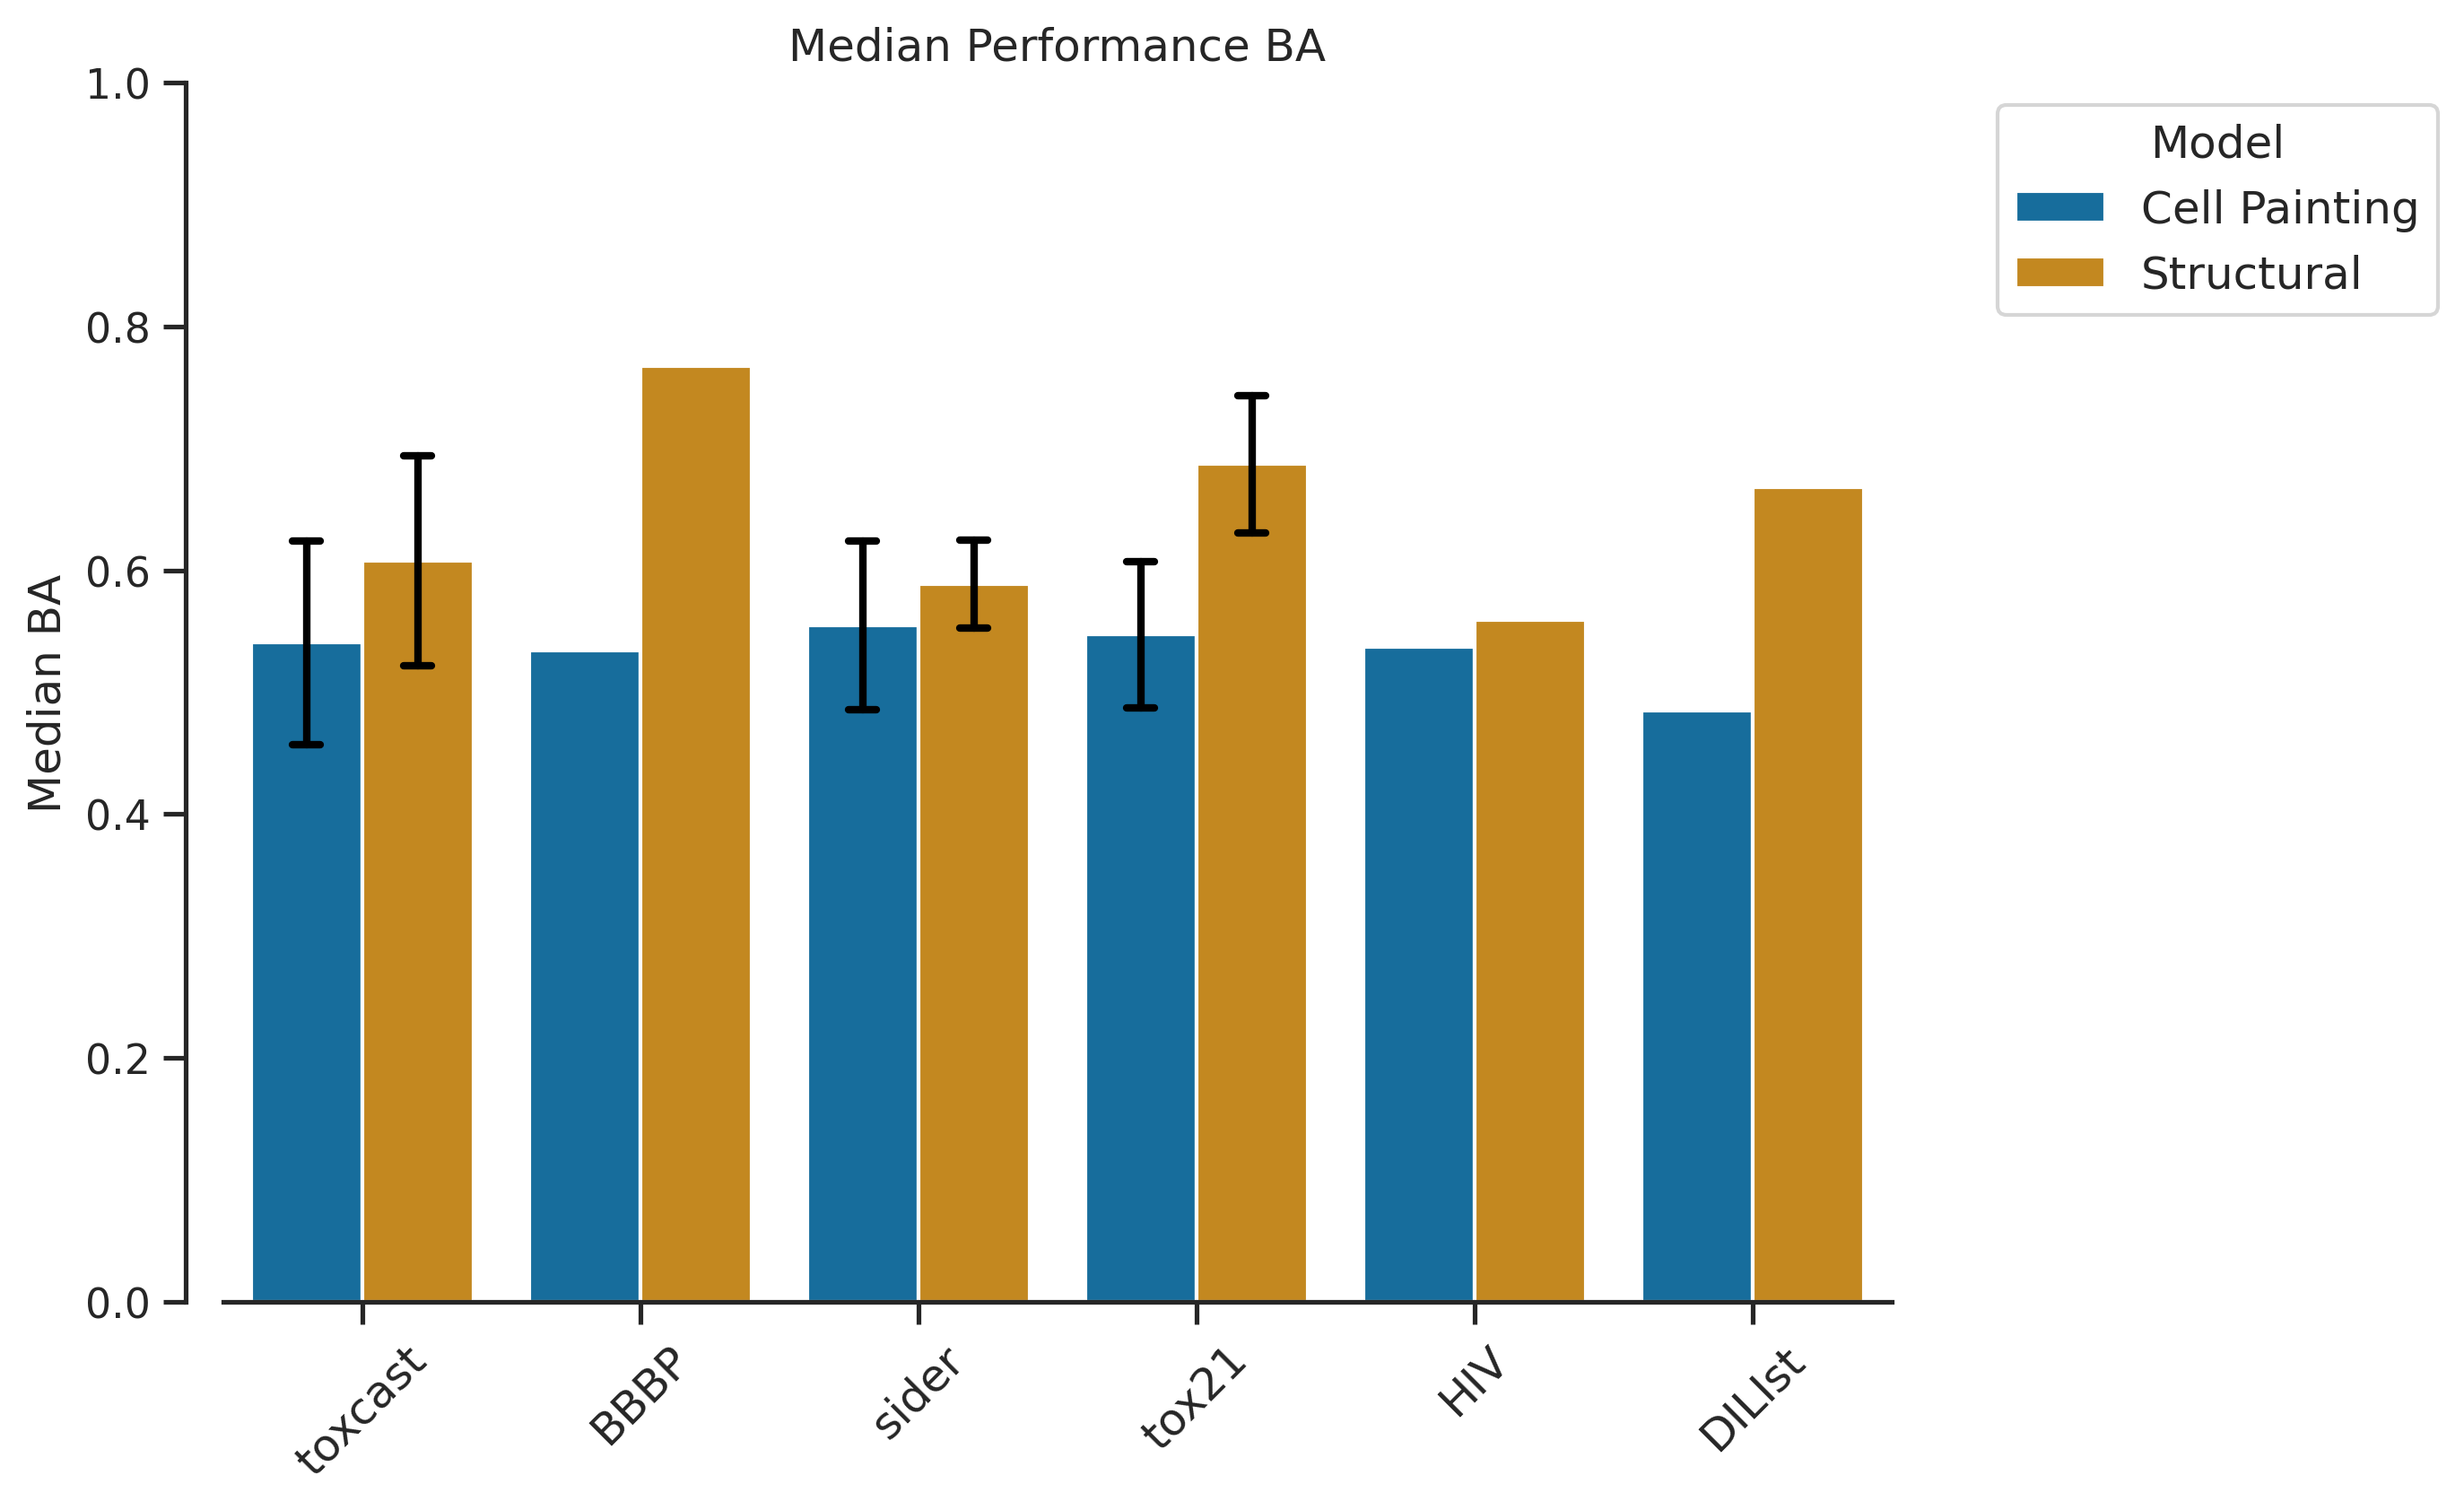

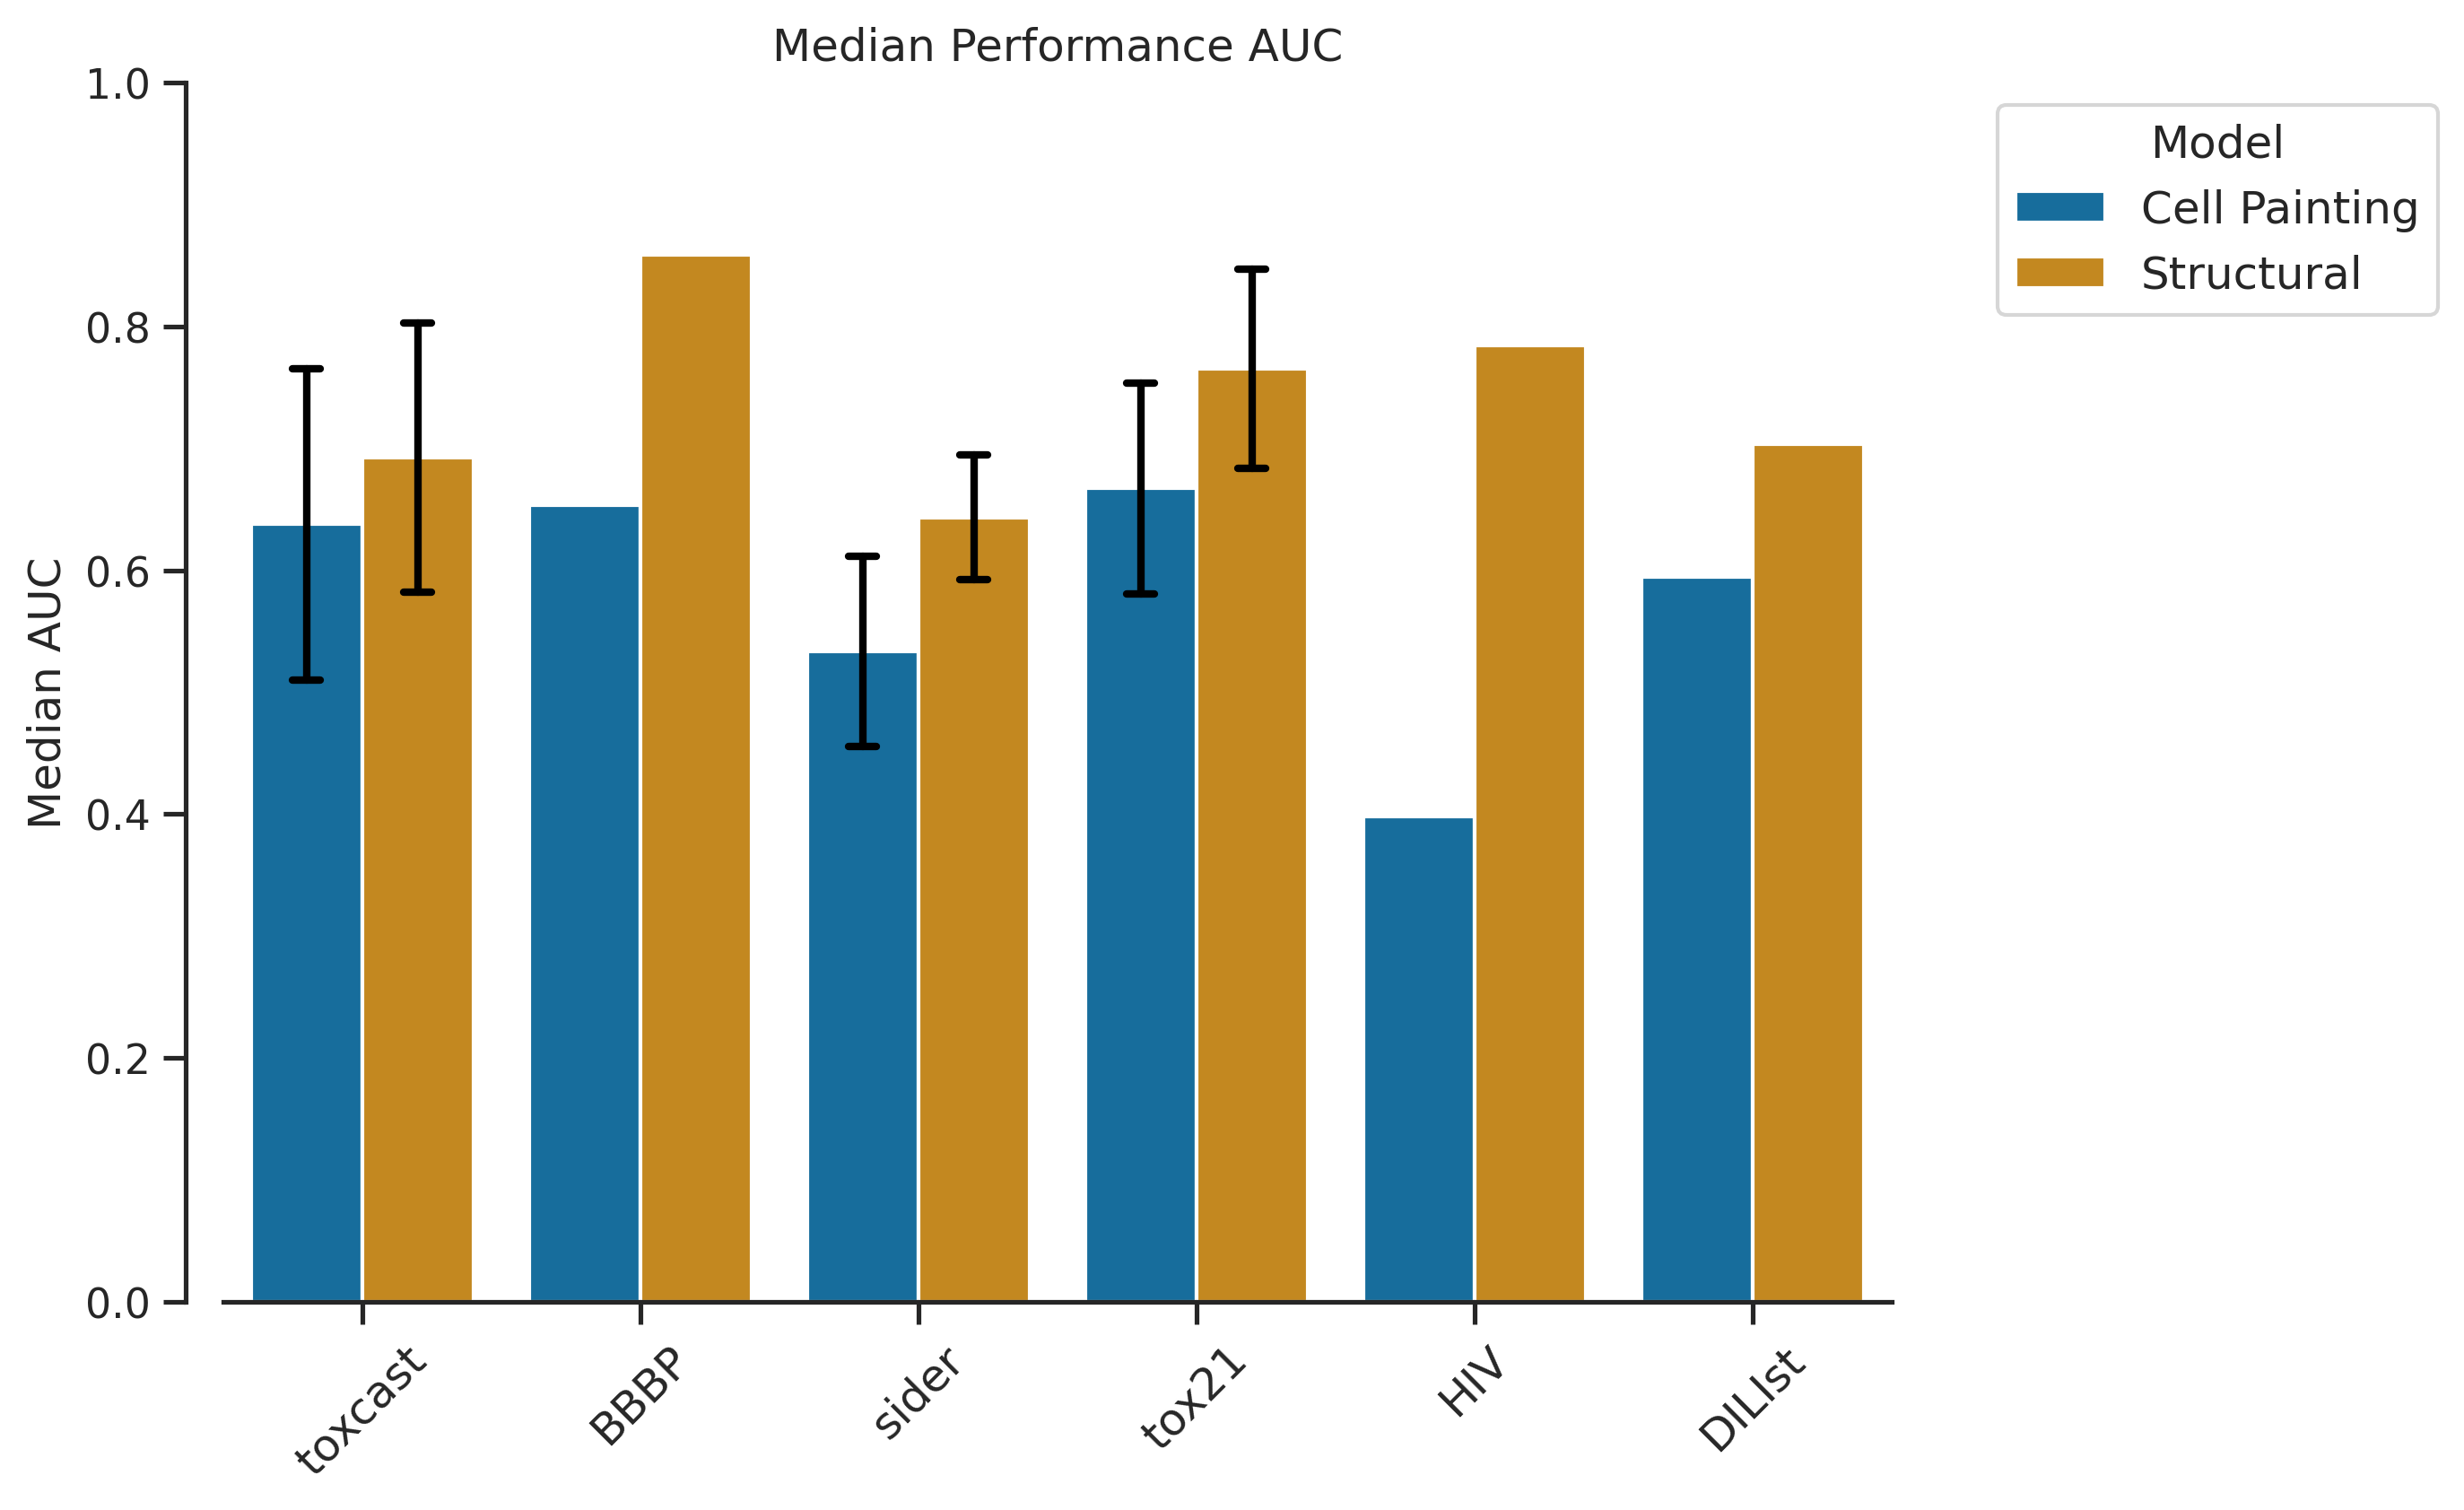

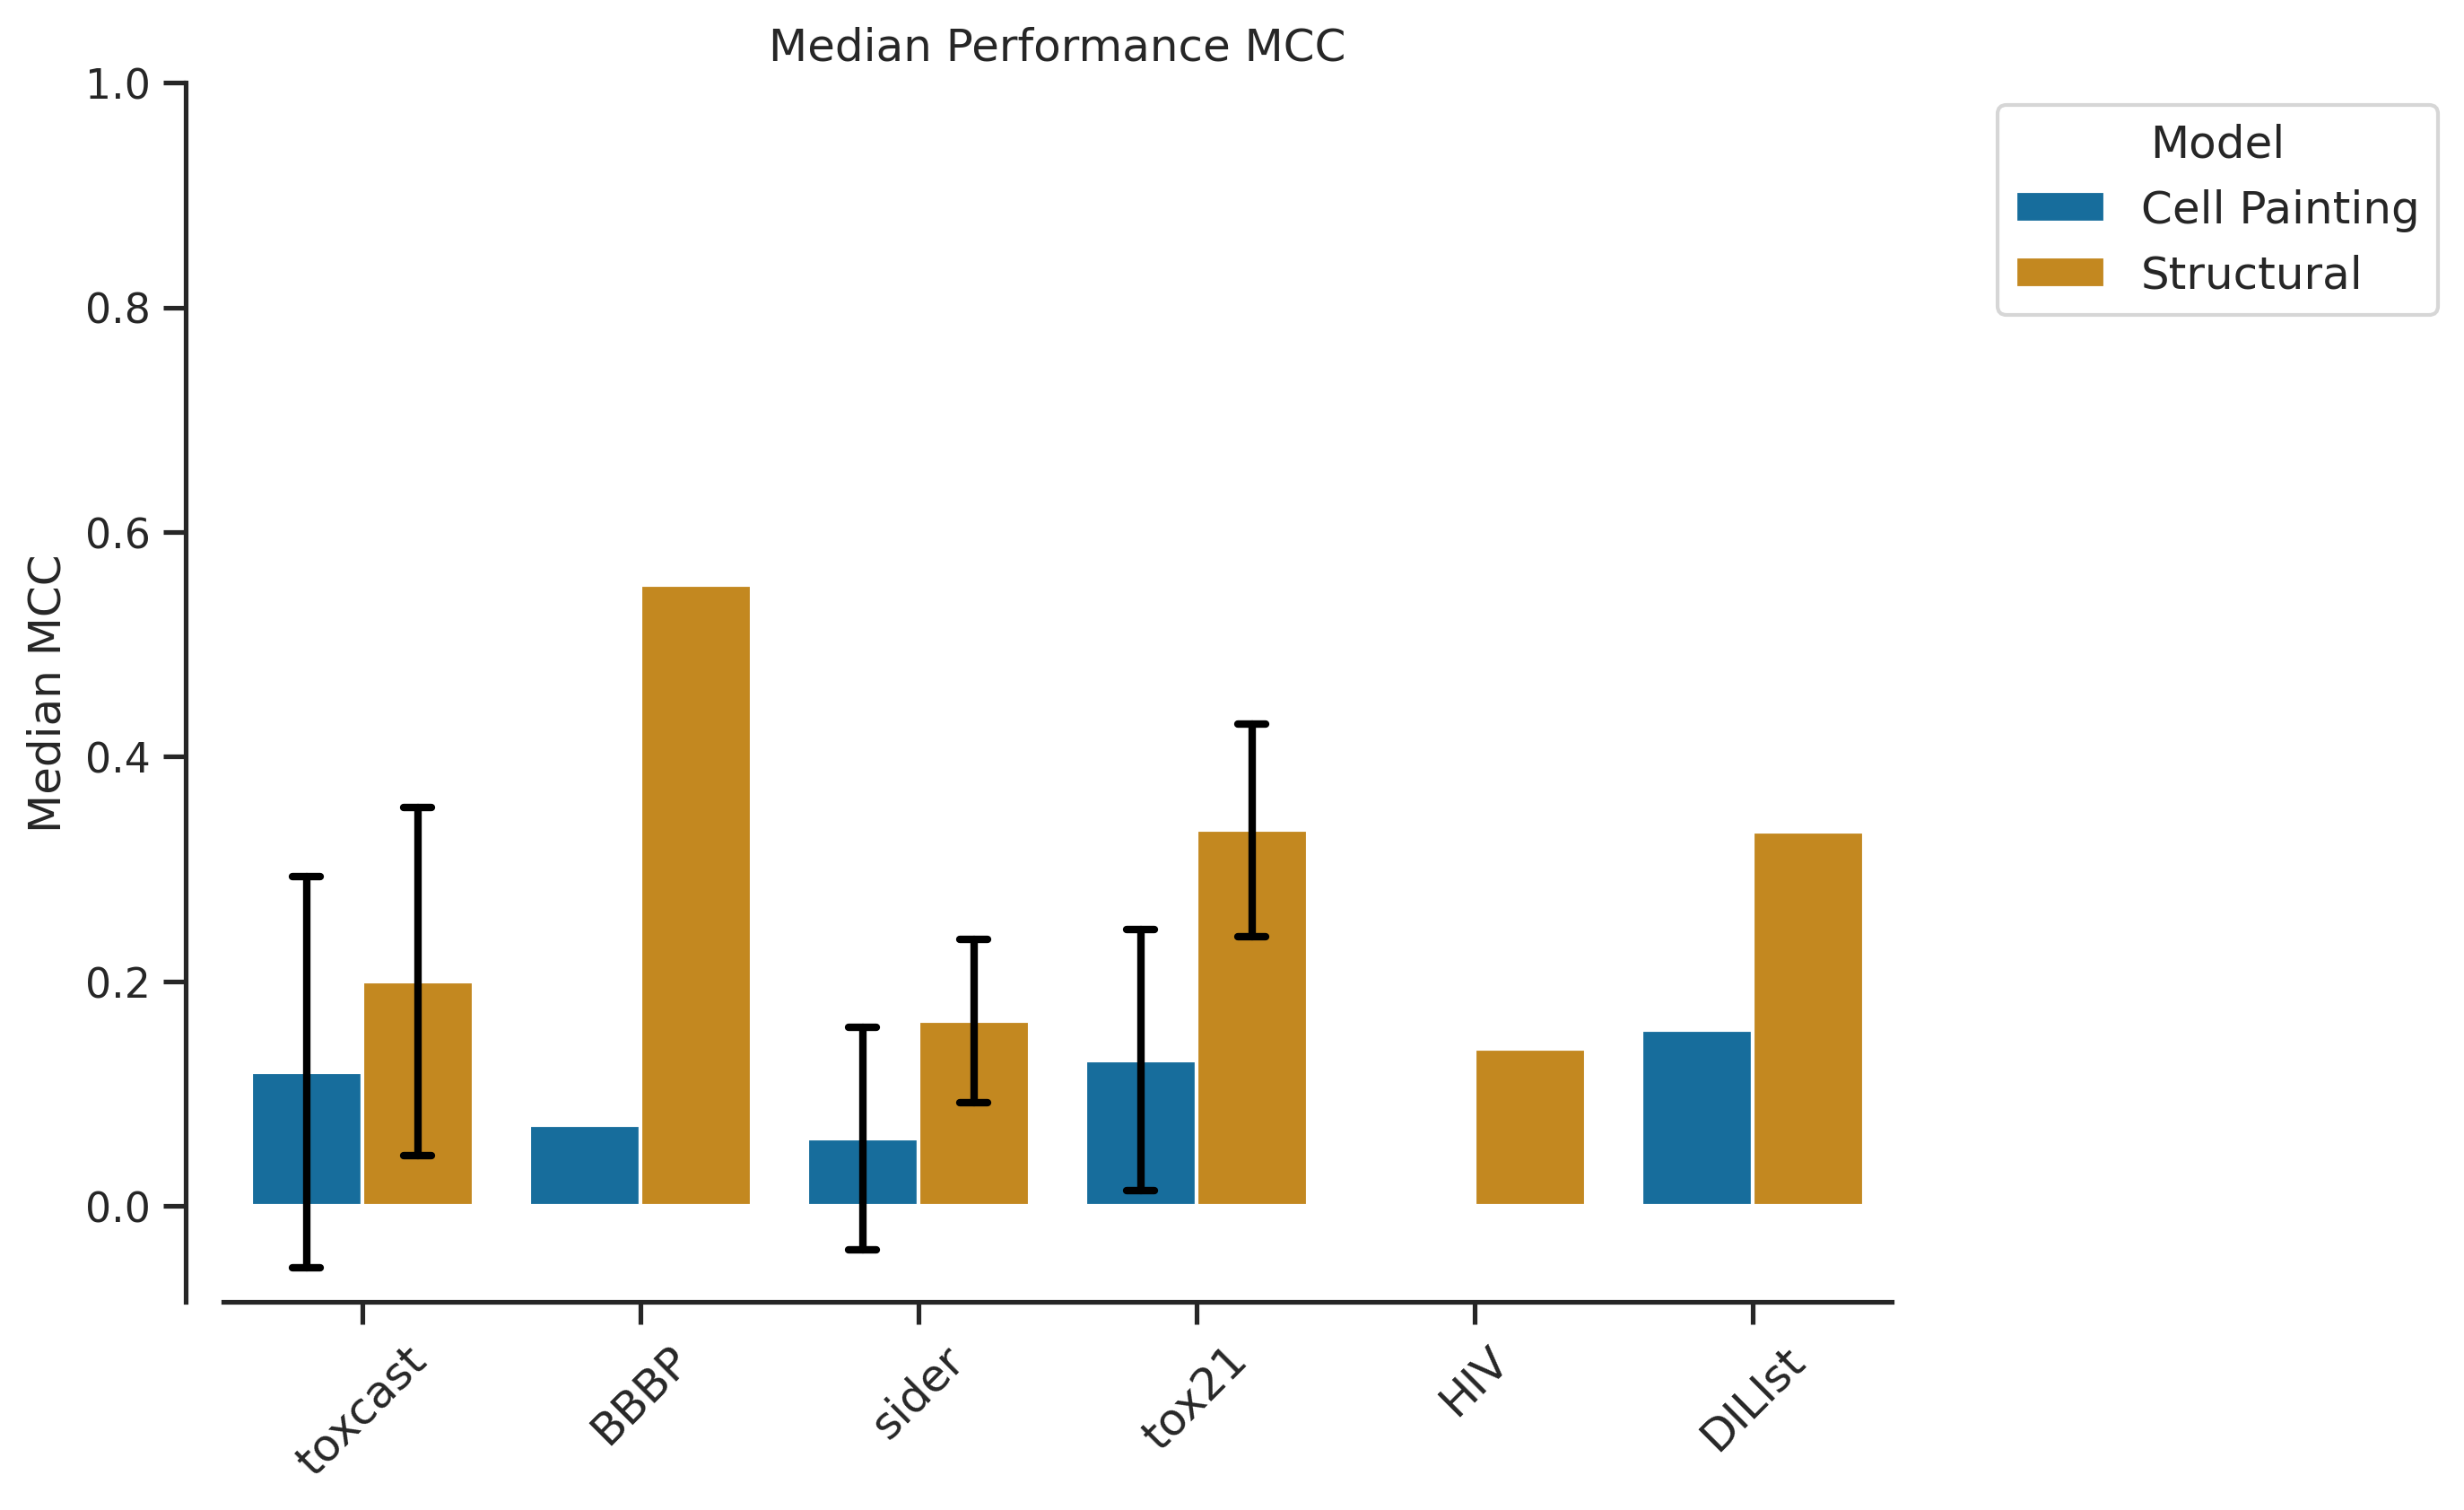

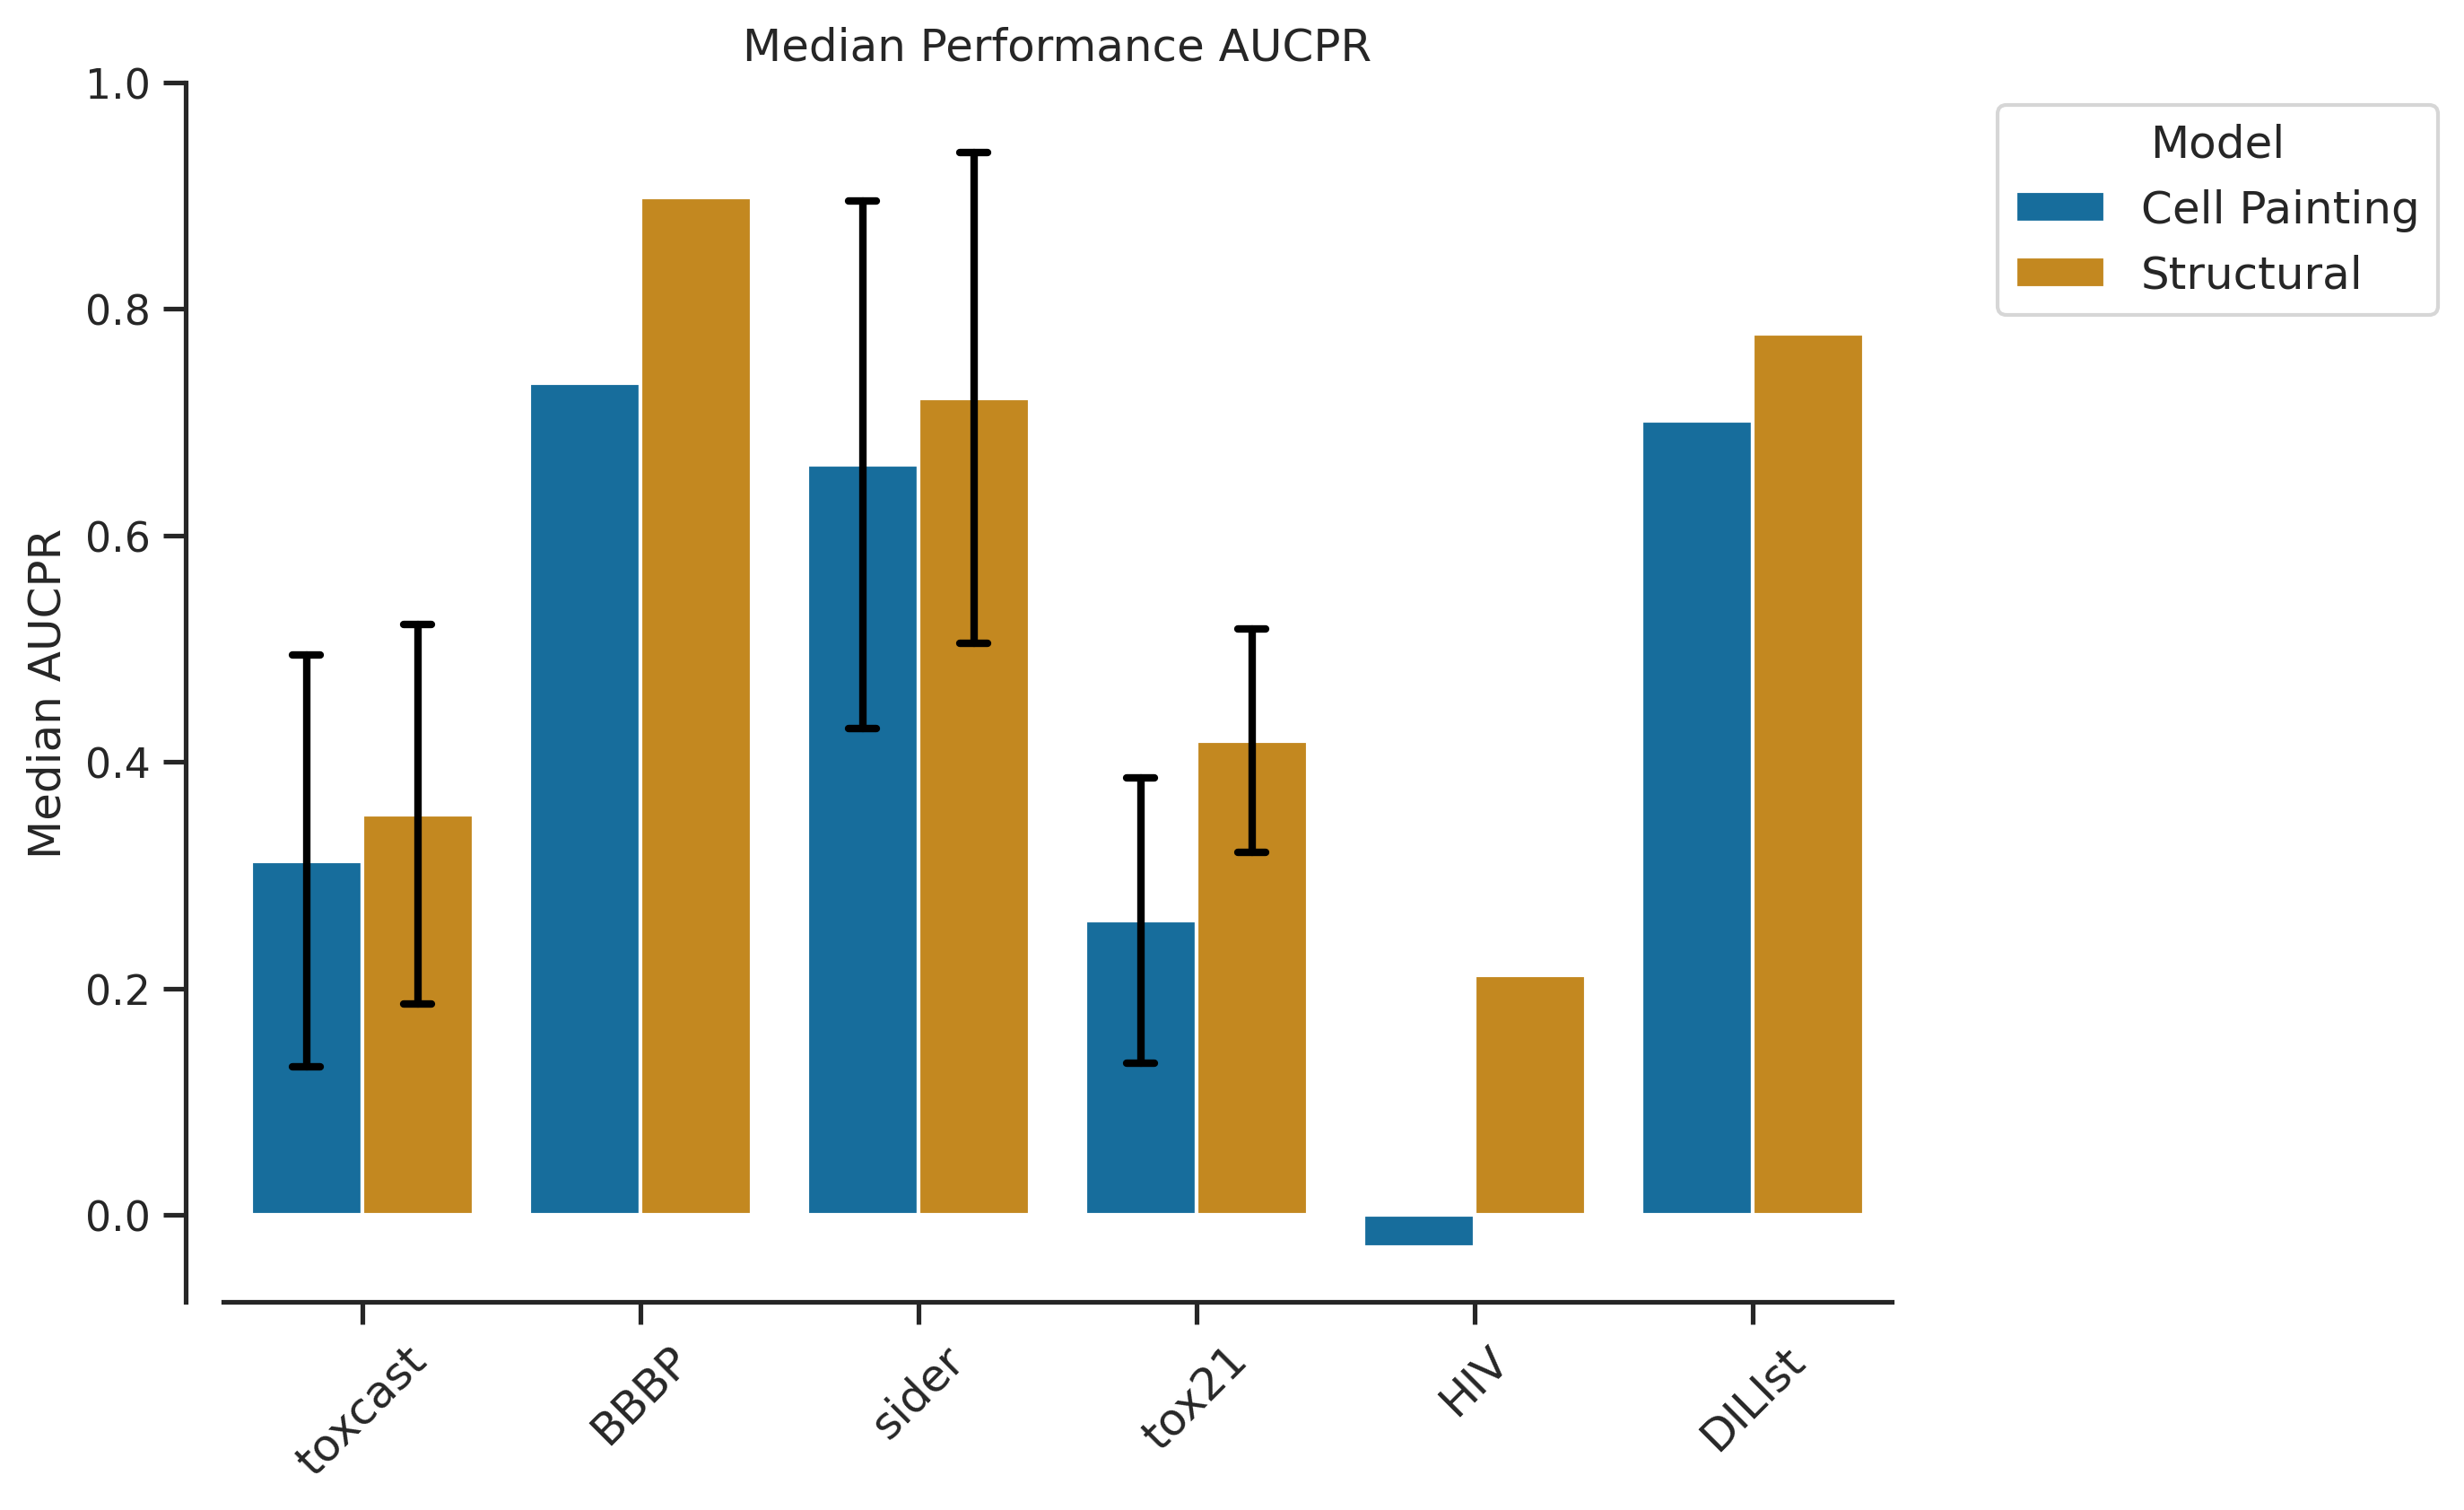

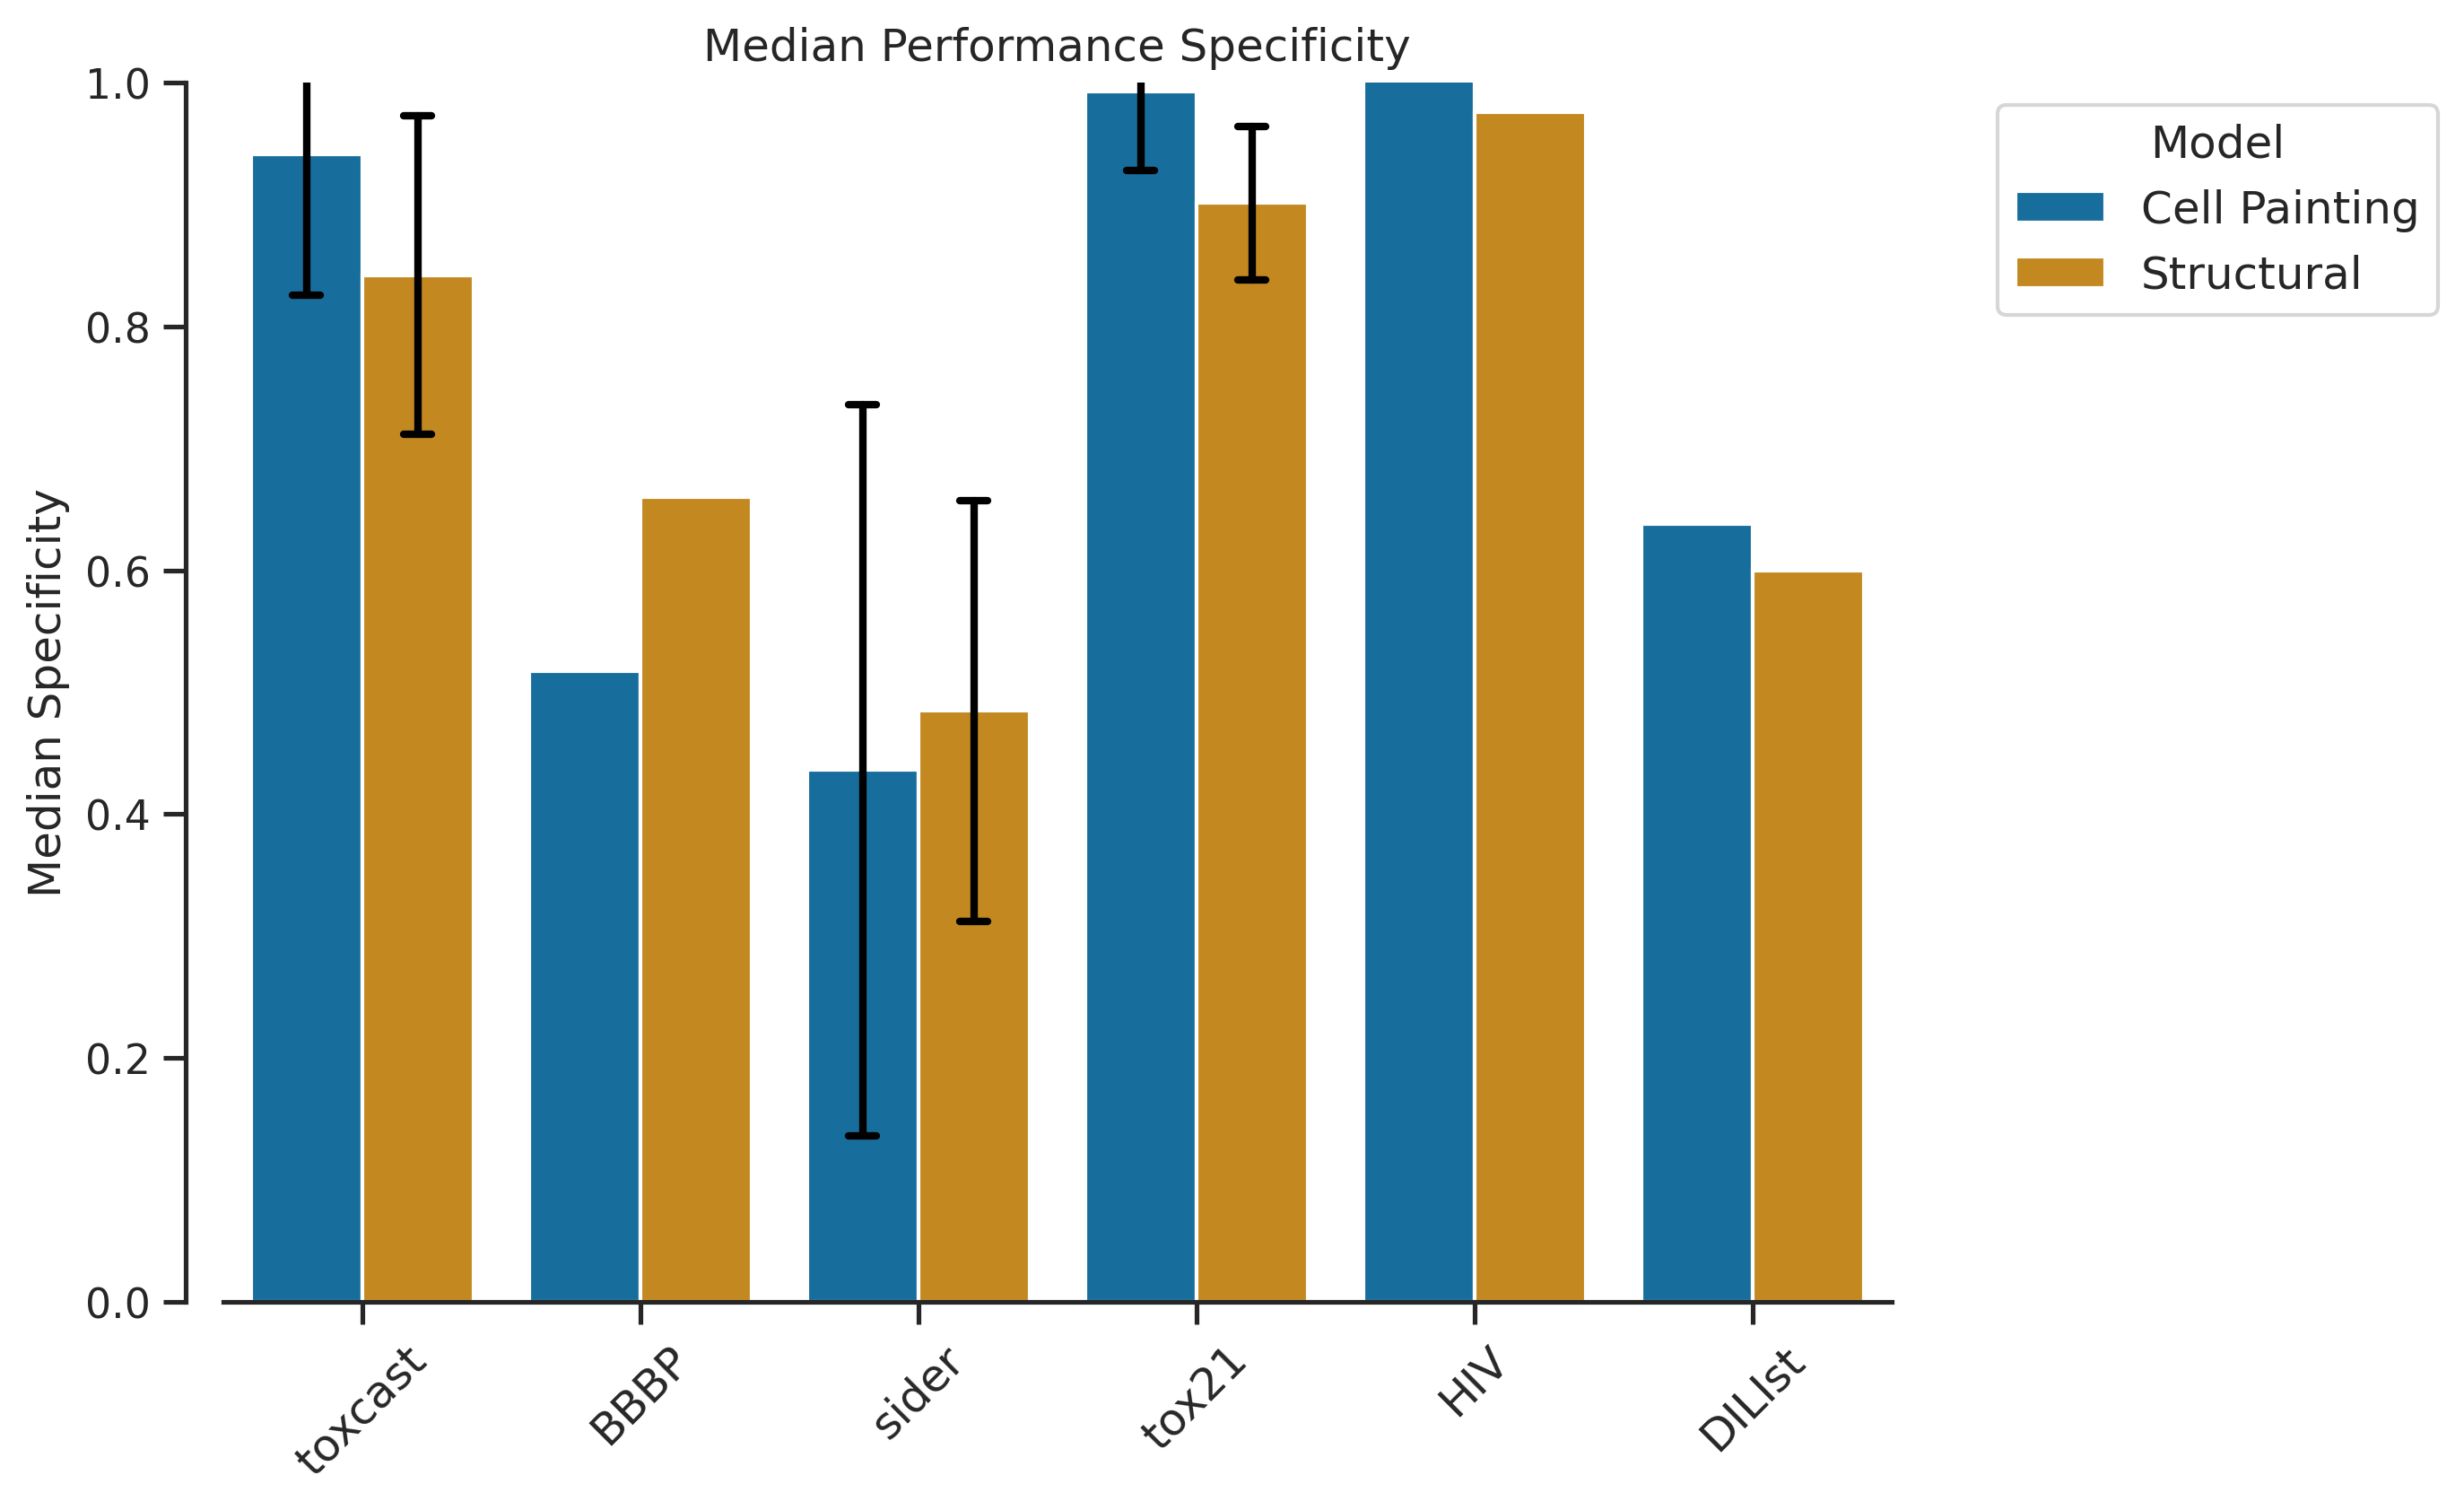

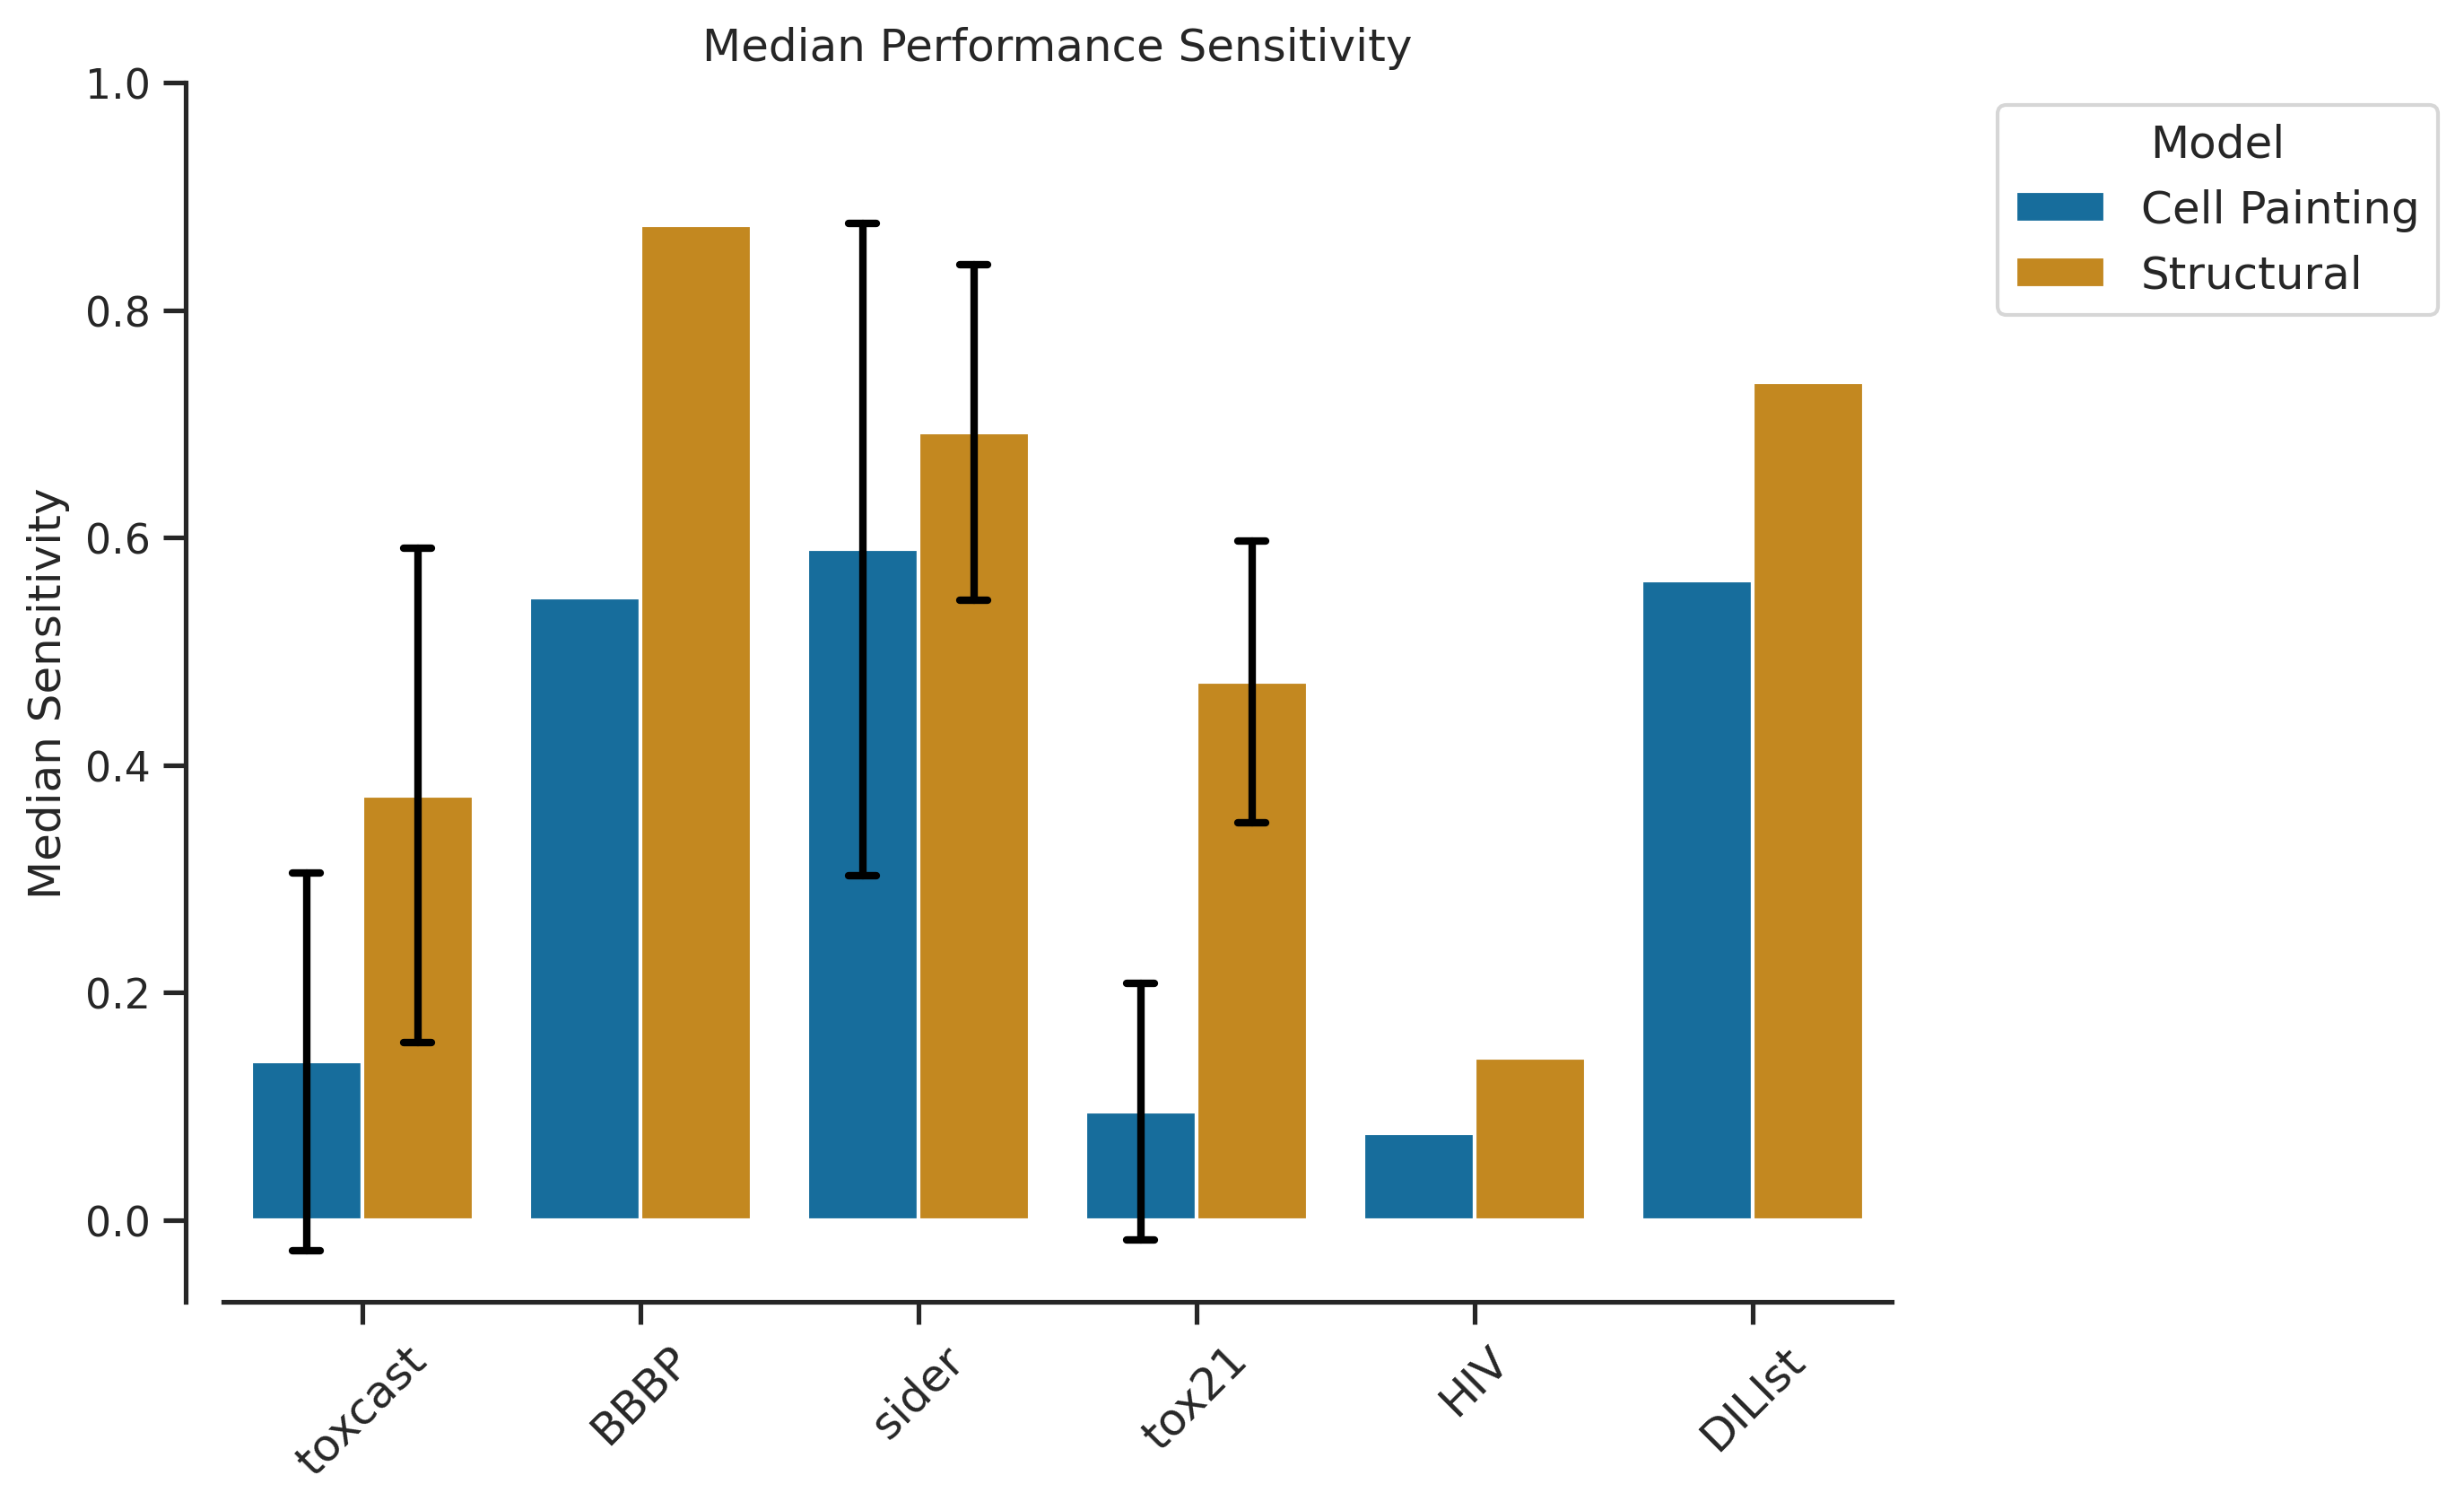

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of metrics to plot
metrics_to_plot = ['BA', 'AUC', 'MCC', 'AUCPR', 'Specificity', 'Sensitivity']

# Exclude the "PK_Lombardo" task
results_df = results_df[~results_df['Task'].isin(["PK_Lombardo"])]

# Set the width for grouped bars
width = 0.2

# Set a colorblind-friendly palette
colors = sns.color_palette("colorblind")

# Loop through each metric and create a grouped bar plot
for metric in metrics_to_plot:
    
    # Create a figure and axis using Seaborn
    plt.figure(figsize=(8, 6), dpi=300) 
    sns.set(style="white")  # Set the style

    metric_data = results_df[[f'img_Held_out_{metric}', 
                                      f'str_Held_out_{metric}', 'Task']]
    
    metric_data.columns = ["Cell Painting", "Structural", "Task"]

    # Melt the DataFrame to use 'hue' for differentiation
    melted_data = metric_data.reset_index().melt(id_vars='Task', 
                                            value_vars=["Cell Painting", "Structural"], 
                                            var_name='Metric', 
                                            value_name='Median Metric')
    # Create the grouped bar plot
    ax = sns.barplot(data=melted_data, x='Task', y='Median Metric', 
                hue='Metric', ci="sd", palette=colors, errcolor='black', 
                     errwidth=2, capsize=0.1) 
    

    # Set labels and title
    ax.set_ylabel(f'Median {metric}', fontsize=12)
    ax.set_title(f'Median Performance {metric}', fontsize=12)
    
    # Set x-axis ticks and labels with rotation, increased fontsize
    x_ticks = range(len(melted_data['Task'].unique()))
    x_labels = melted_data['Task'].unique()
    ax.set_xticklabels(x_labels, rotation=45, fontsize=12)  # Adjust rotation angle and fontsize

    # Add legend outside the box, on the upper right
    ax.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

    # Remove box line, set y-axis on the left, and add a line on the x-axis
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_position(('outward', 10))
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    # Ensure the bars sit on the x-axis
    ax.set_ylim(top=1.0)
    
    # Remove x-axis label
    ax.set_xlabel('')

    # Show the plot
    plt.savefig(f'{metric}_barplot_comparison.png', bbox_inches='tight')
    plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

sider_Cell Painting v.s. sider_Structural: t-test paired samples with Bonferroni correction, P_val=1.166e-01 stat=-2.180e+00
toxcast_Cell Painting v.s. toxcast_Structural: t-test paired samples with Bonferroni correction, P_val=9.473e-23 stat=-1.073e+01
tox21_Cell Painting v.s. tox21_Structural: t-test paired samples with Bonferroni correction, P_val=2.365e-04 stat=-6.087e+00


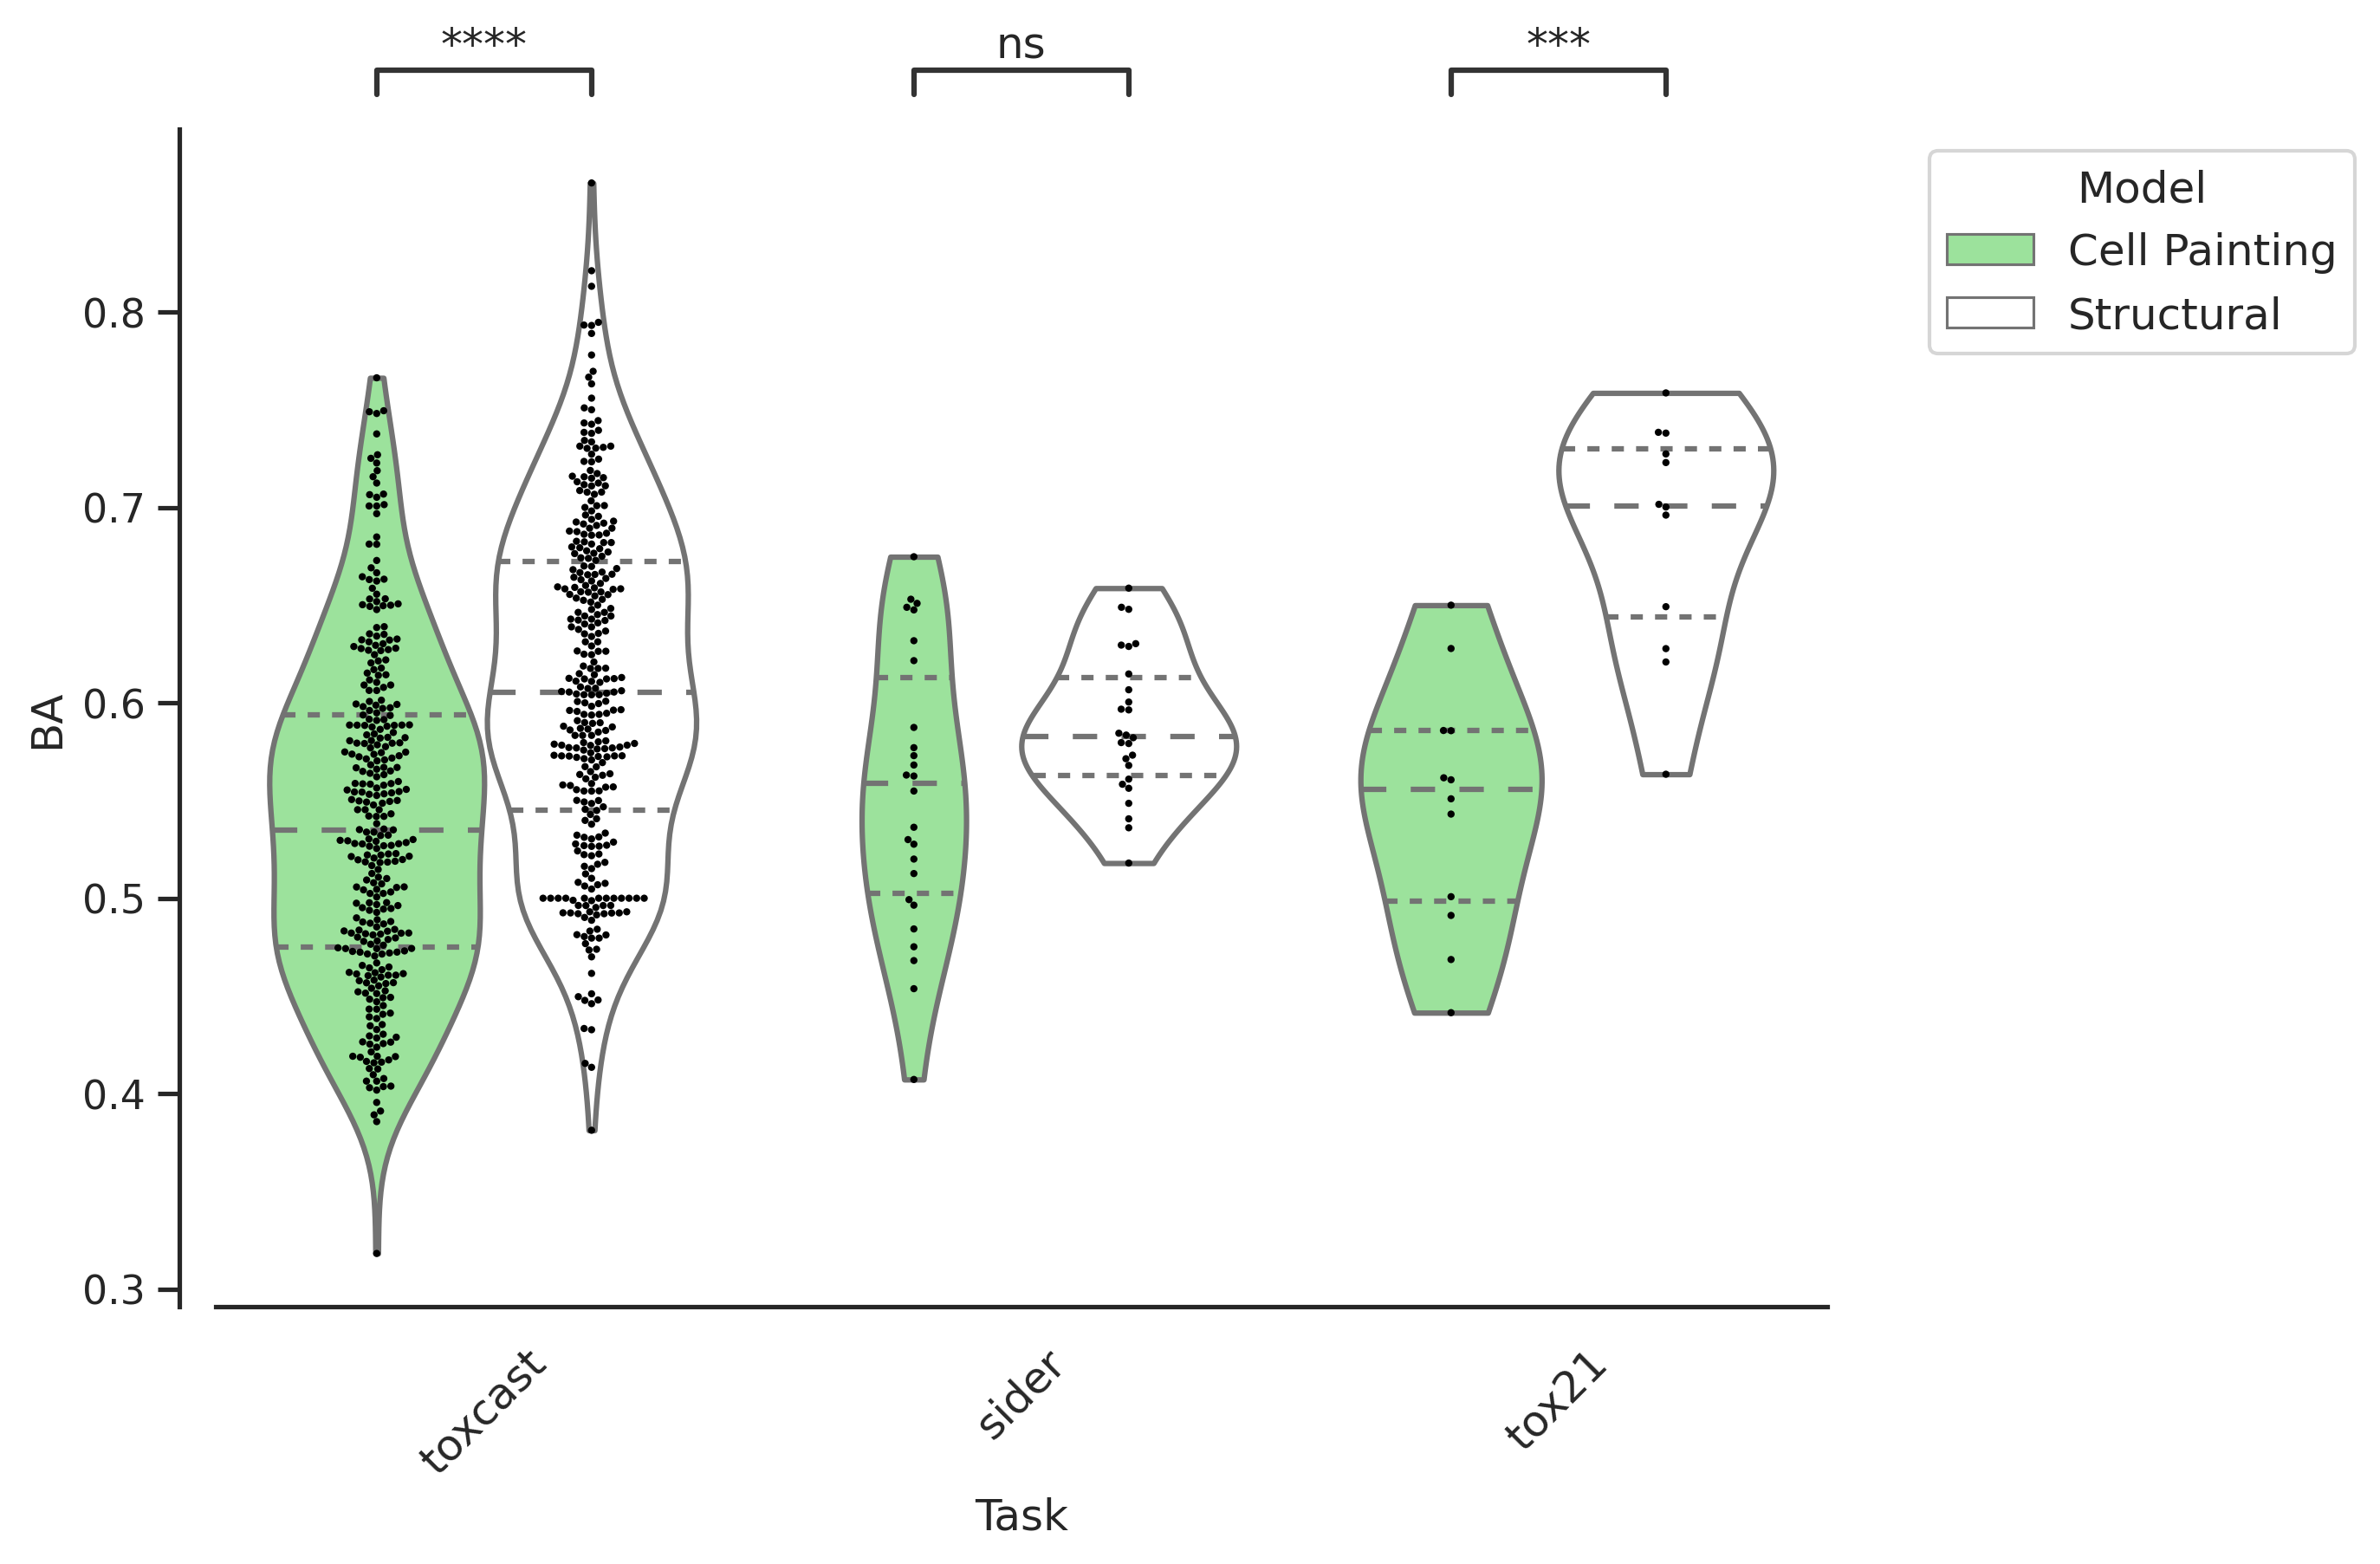

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

sider_Cell Painting v.s. sider_Structural: t-test paired samples with Bonferroni correction, P_val=1.511e-06 stat=-6.703e+00
toxcast_Cell Painting v.s. toxcast_Structural: t-test paired samples with Bonferroni correction, P_val=6.168e-10 stat=-6.563e+00
tox21_Cell Painting v.s. tox21_Structural: t-test paired samples with Bonferroni correction, P_val=9.246e-04 stat=-5.171e+00


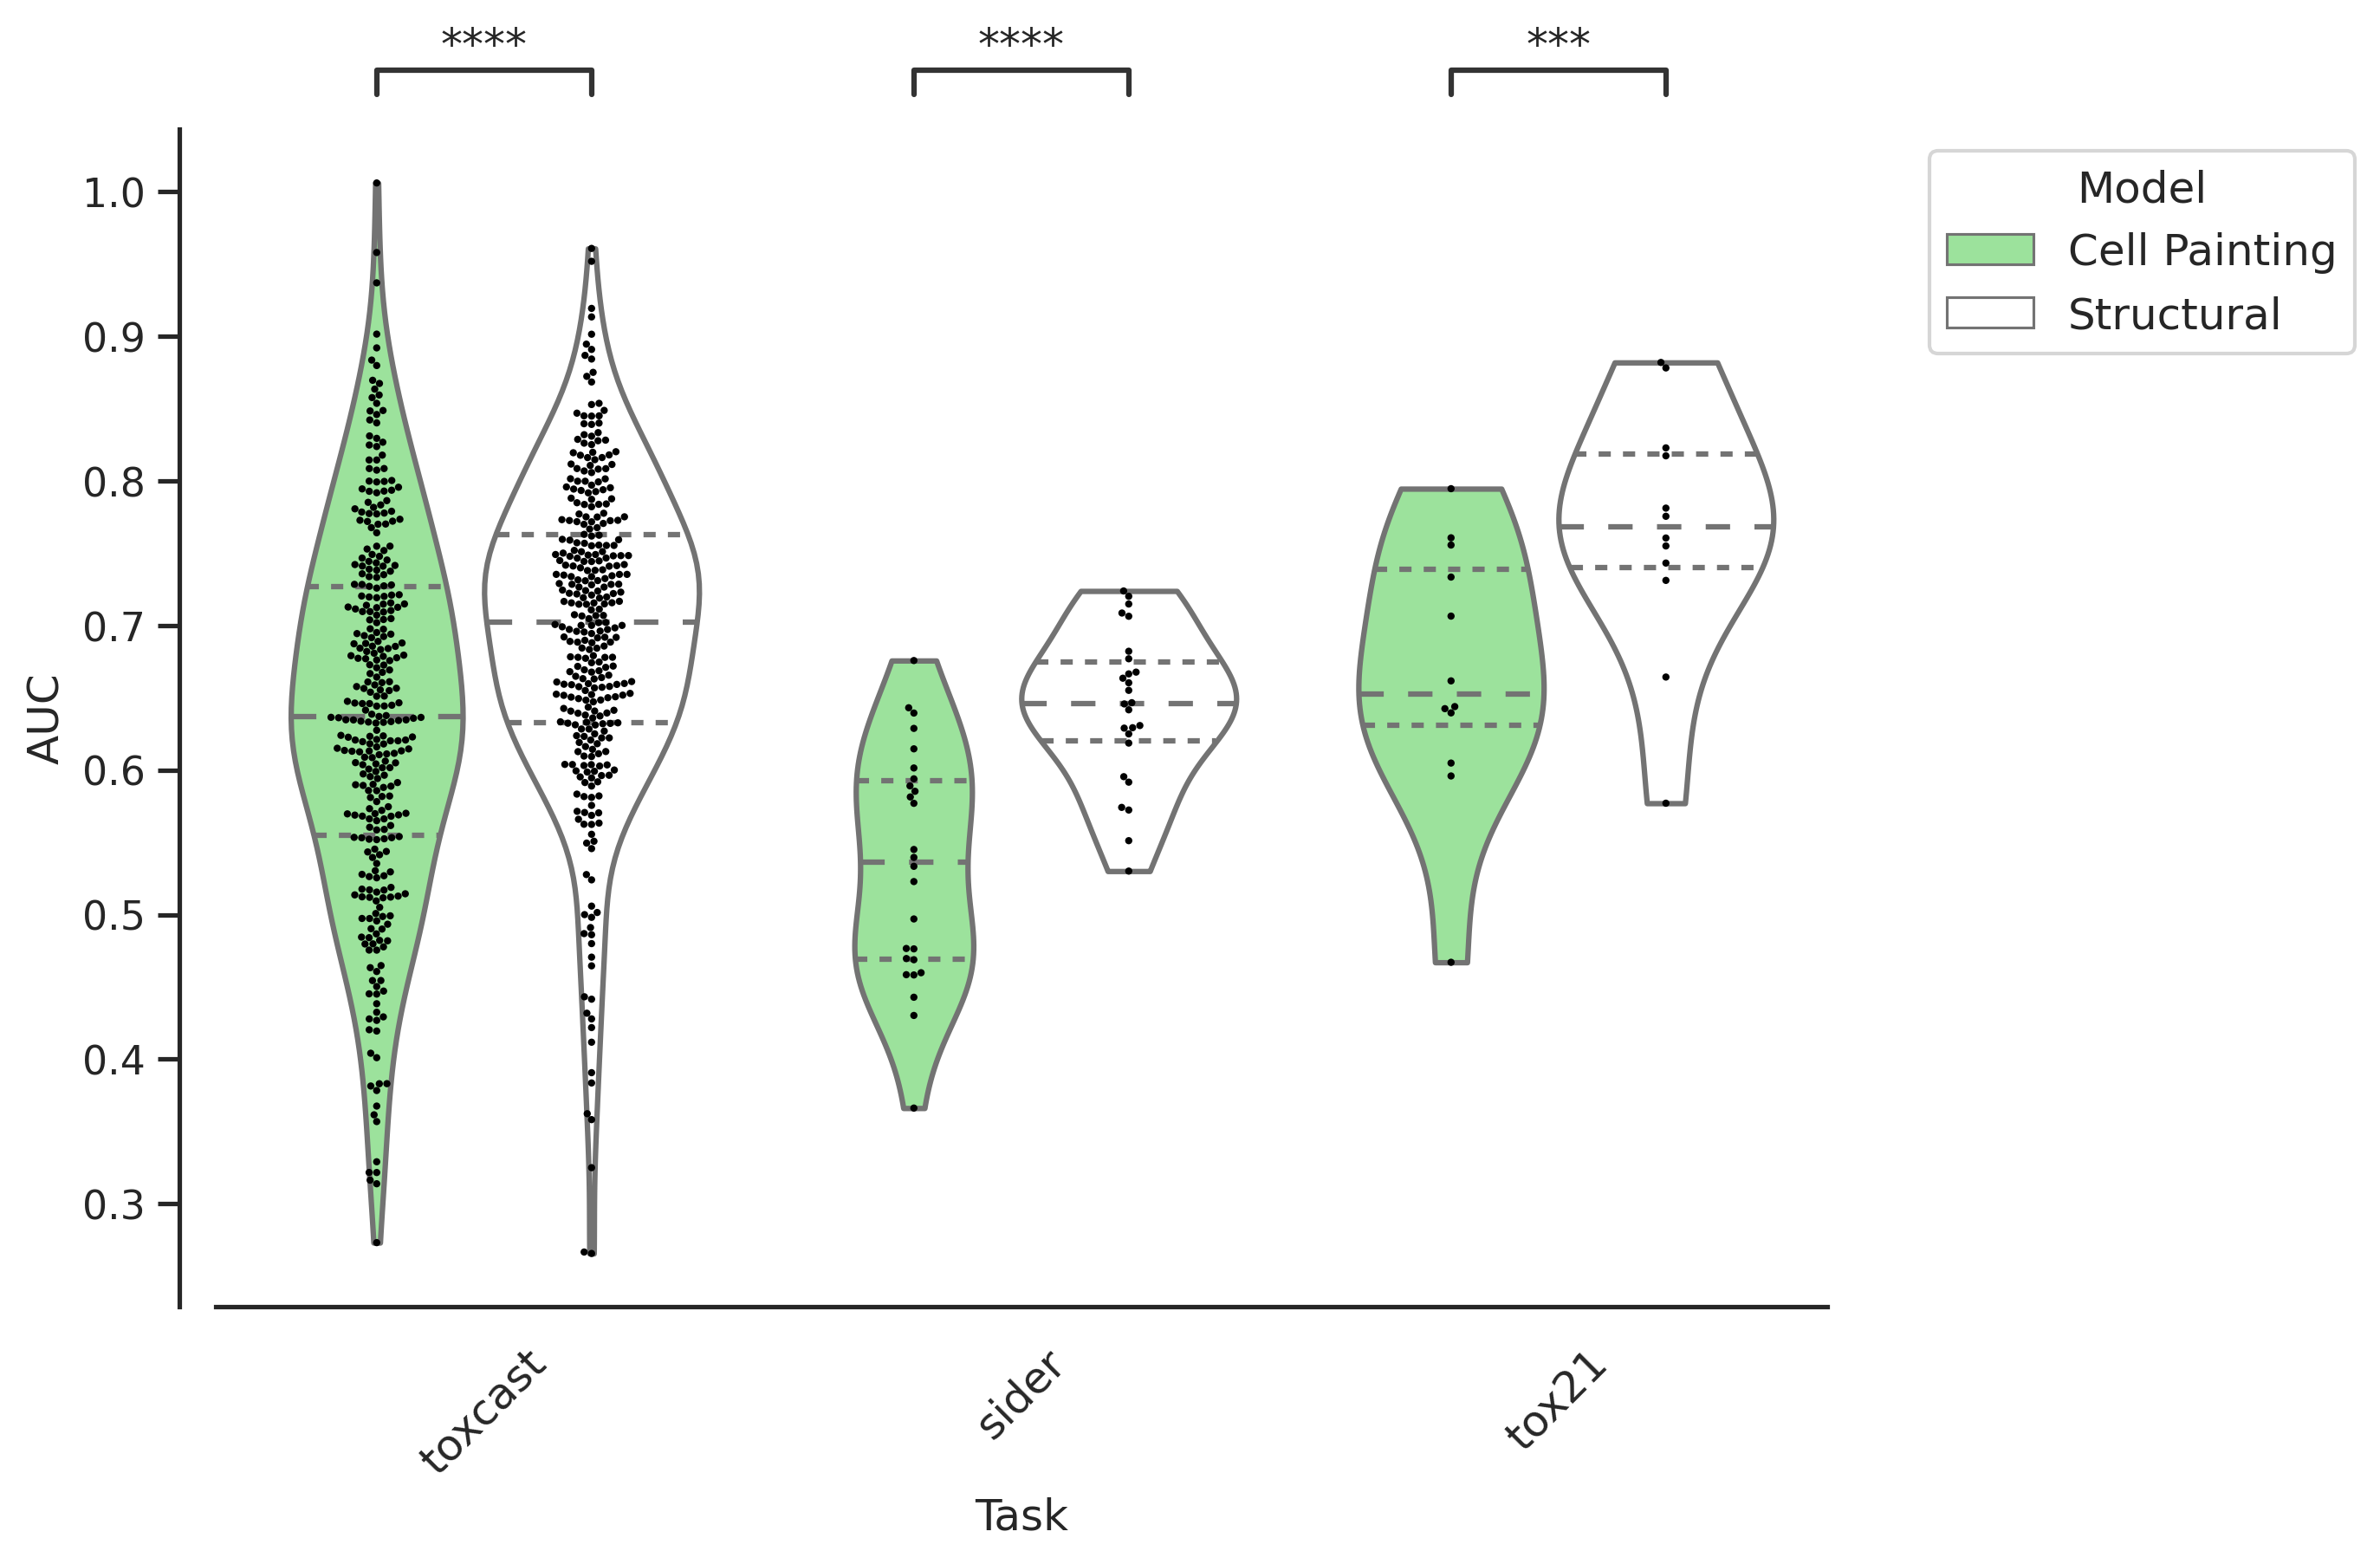

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

sider_Cell Painting v.s. sider_Structural: t-test paired samples with Bonferroni correction, P_val=1.611e-04 stat=-4.859e+00
toxcast_Cell Painting v.s. toxcast_Structural: t-test paired samples with Bonferroni correction, P_val=1.440e-10 stat=-6.805e+00
tox21_Cell Painting v.s. tox21_Structural: t-test paired samples with Bonferroni correction, P_val=1.297e-03 stat=-4.955e+00


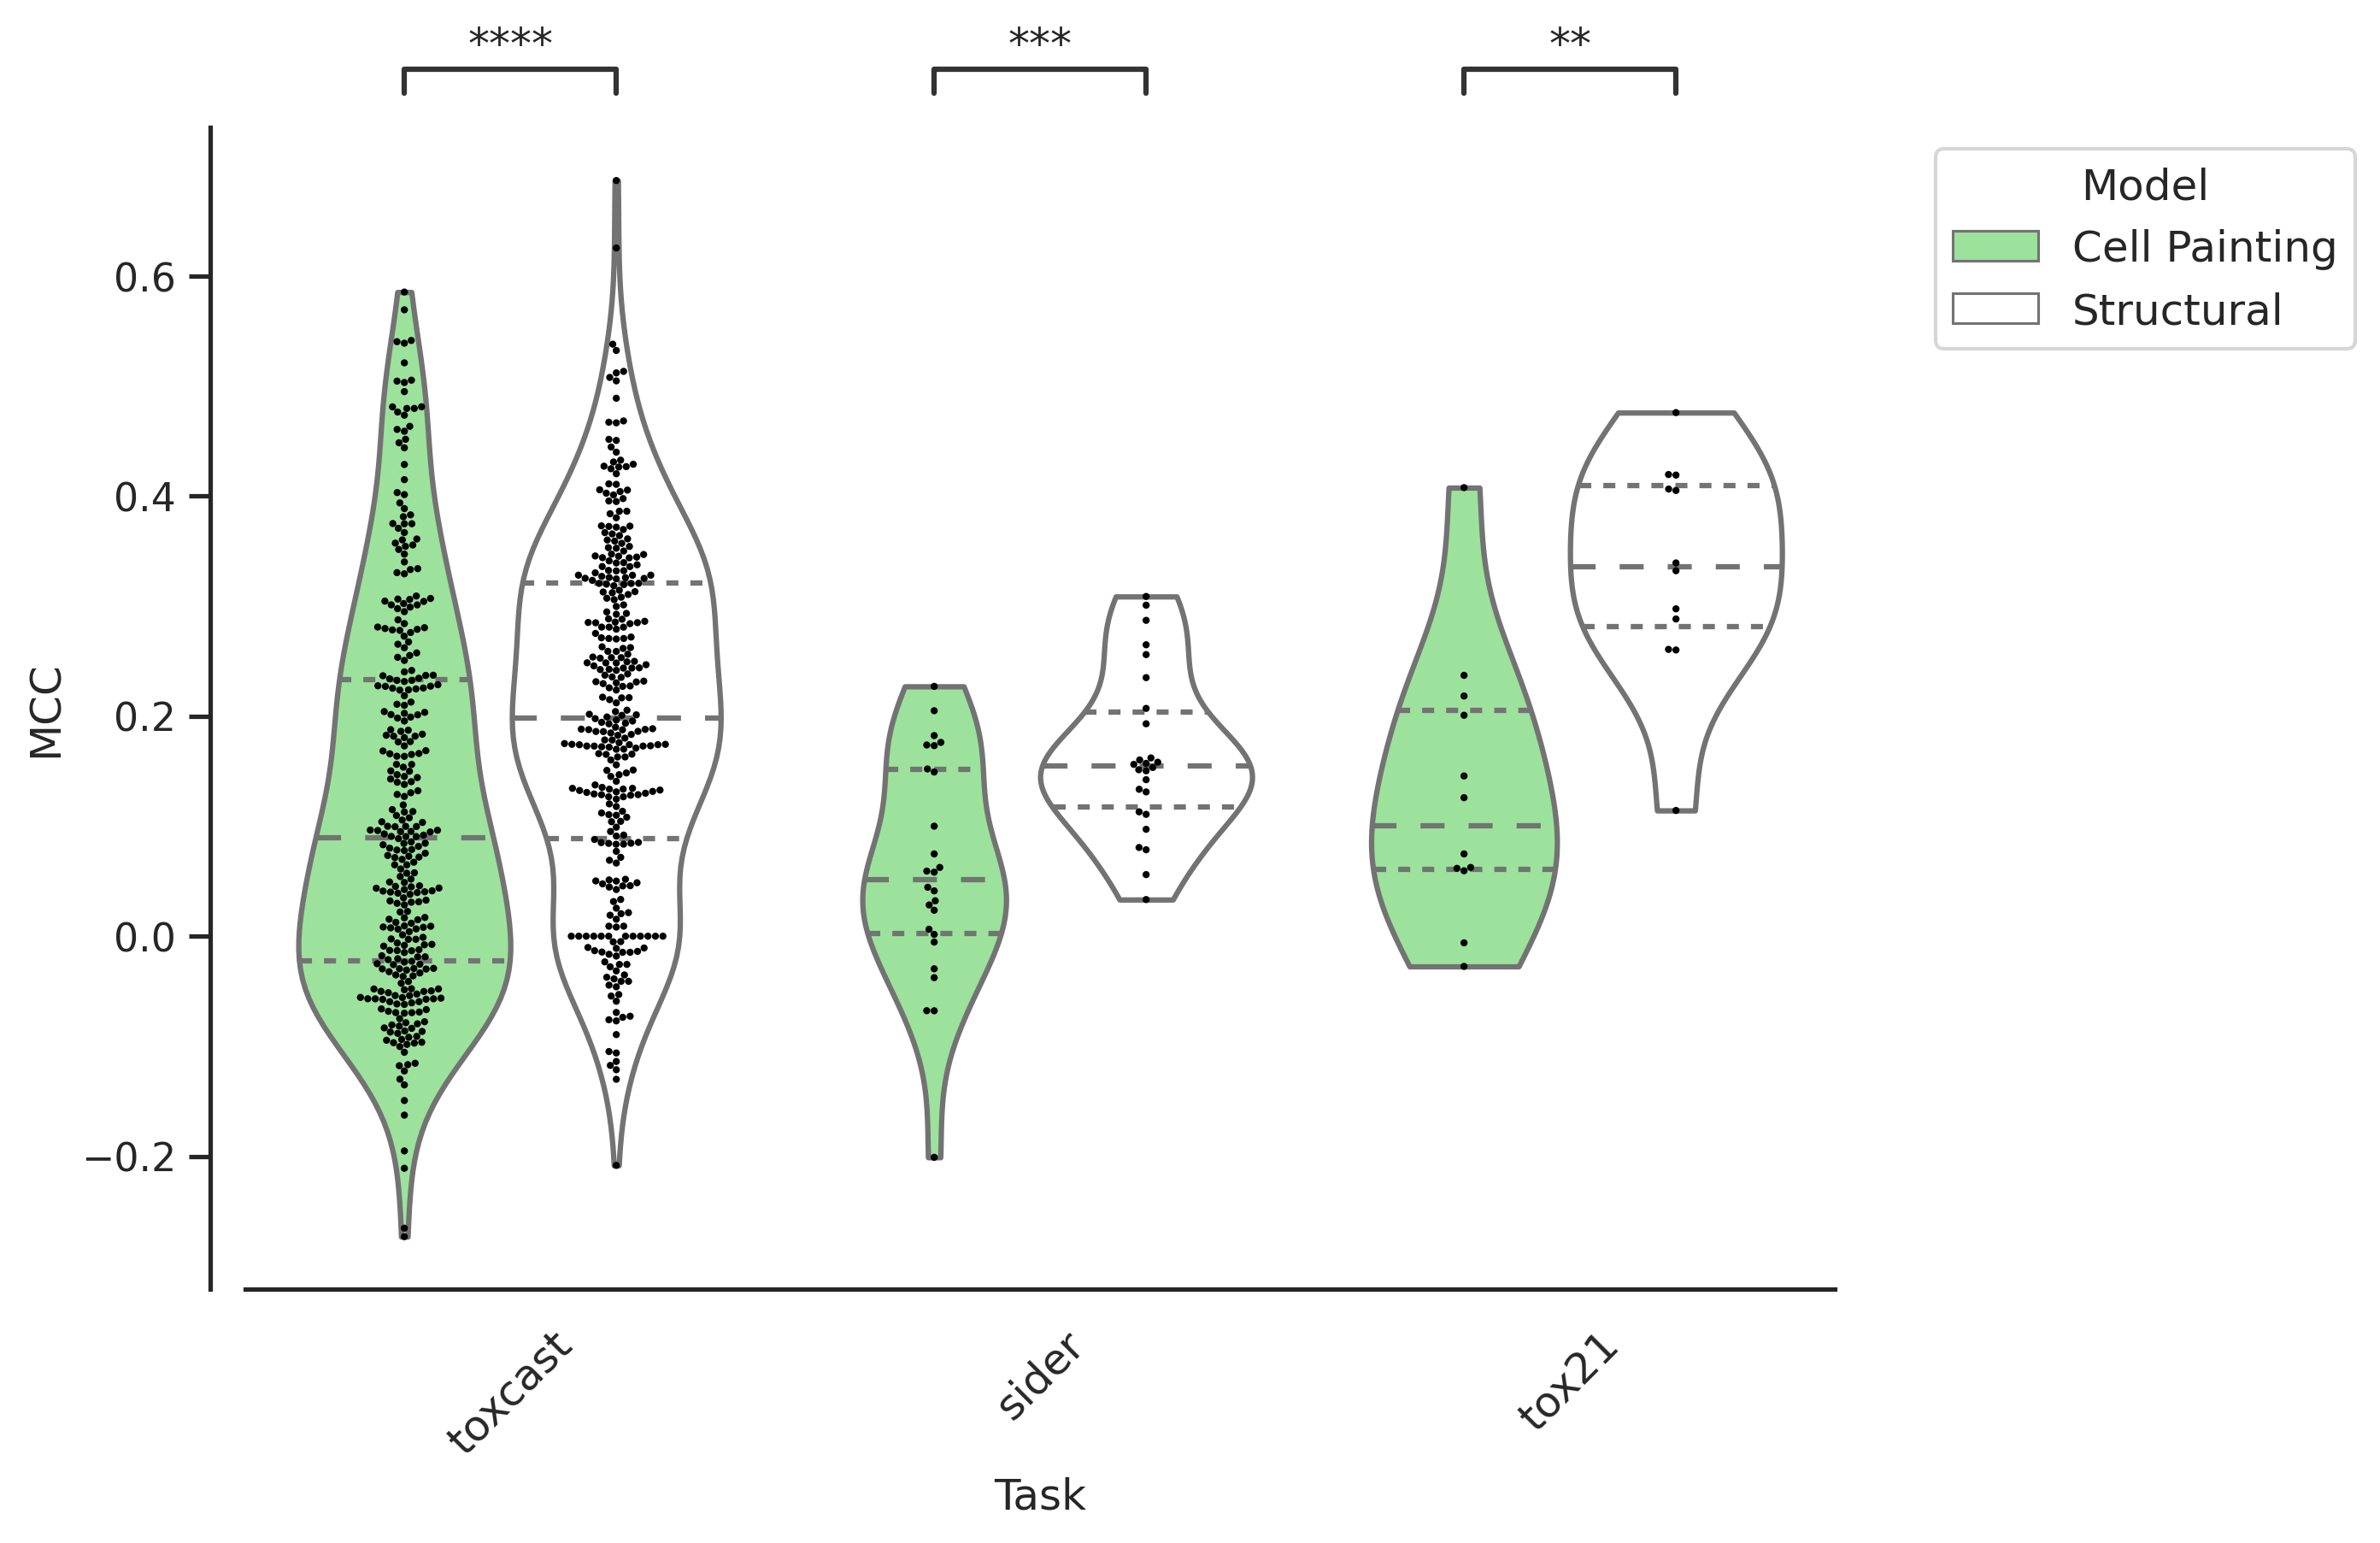

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

sider_Cell Painting v.s. sider_Structural: t-test paired samples with Bonferroni correction, P_val=4.932e-03 stat=-3.528e+00
toxcast_Cell Painting v.s. toxcast_Structural: t-test paired samples with Bonferroni correction, P_val=6.639e-05 stat=-4.304e+00
tox21_Cell Painting v.s. tox21_Structural: t-test paired samples with Bonferroni correction, P_val=1.578e-02 stat=-3.468e+00


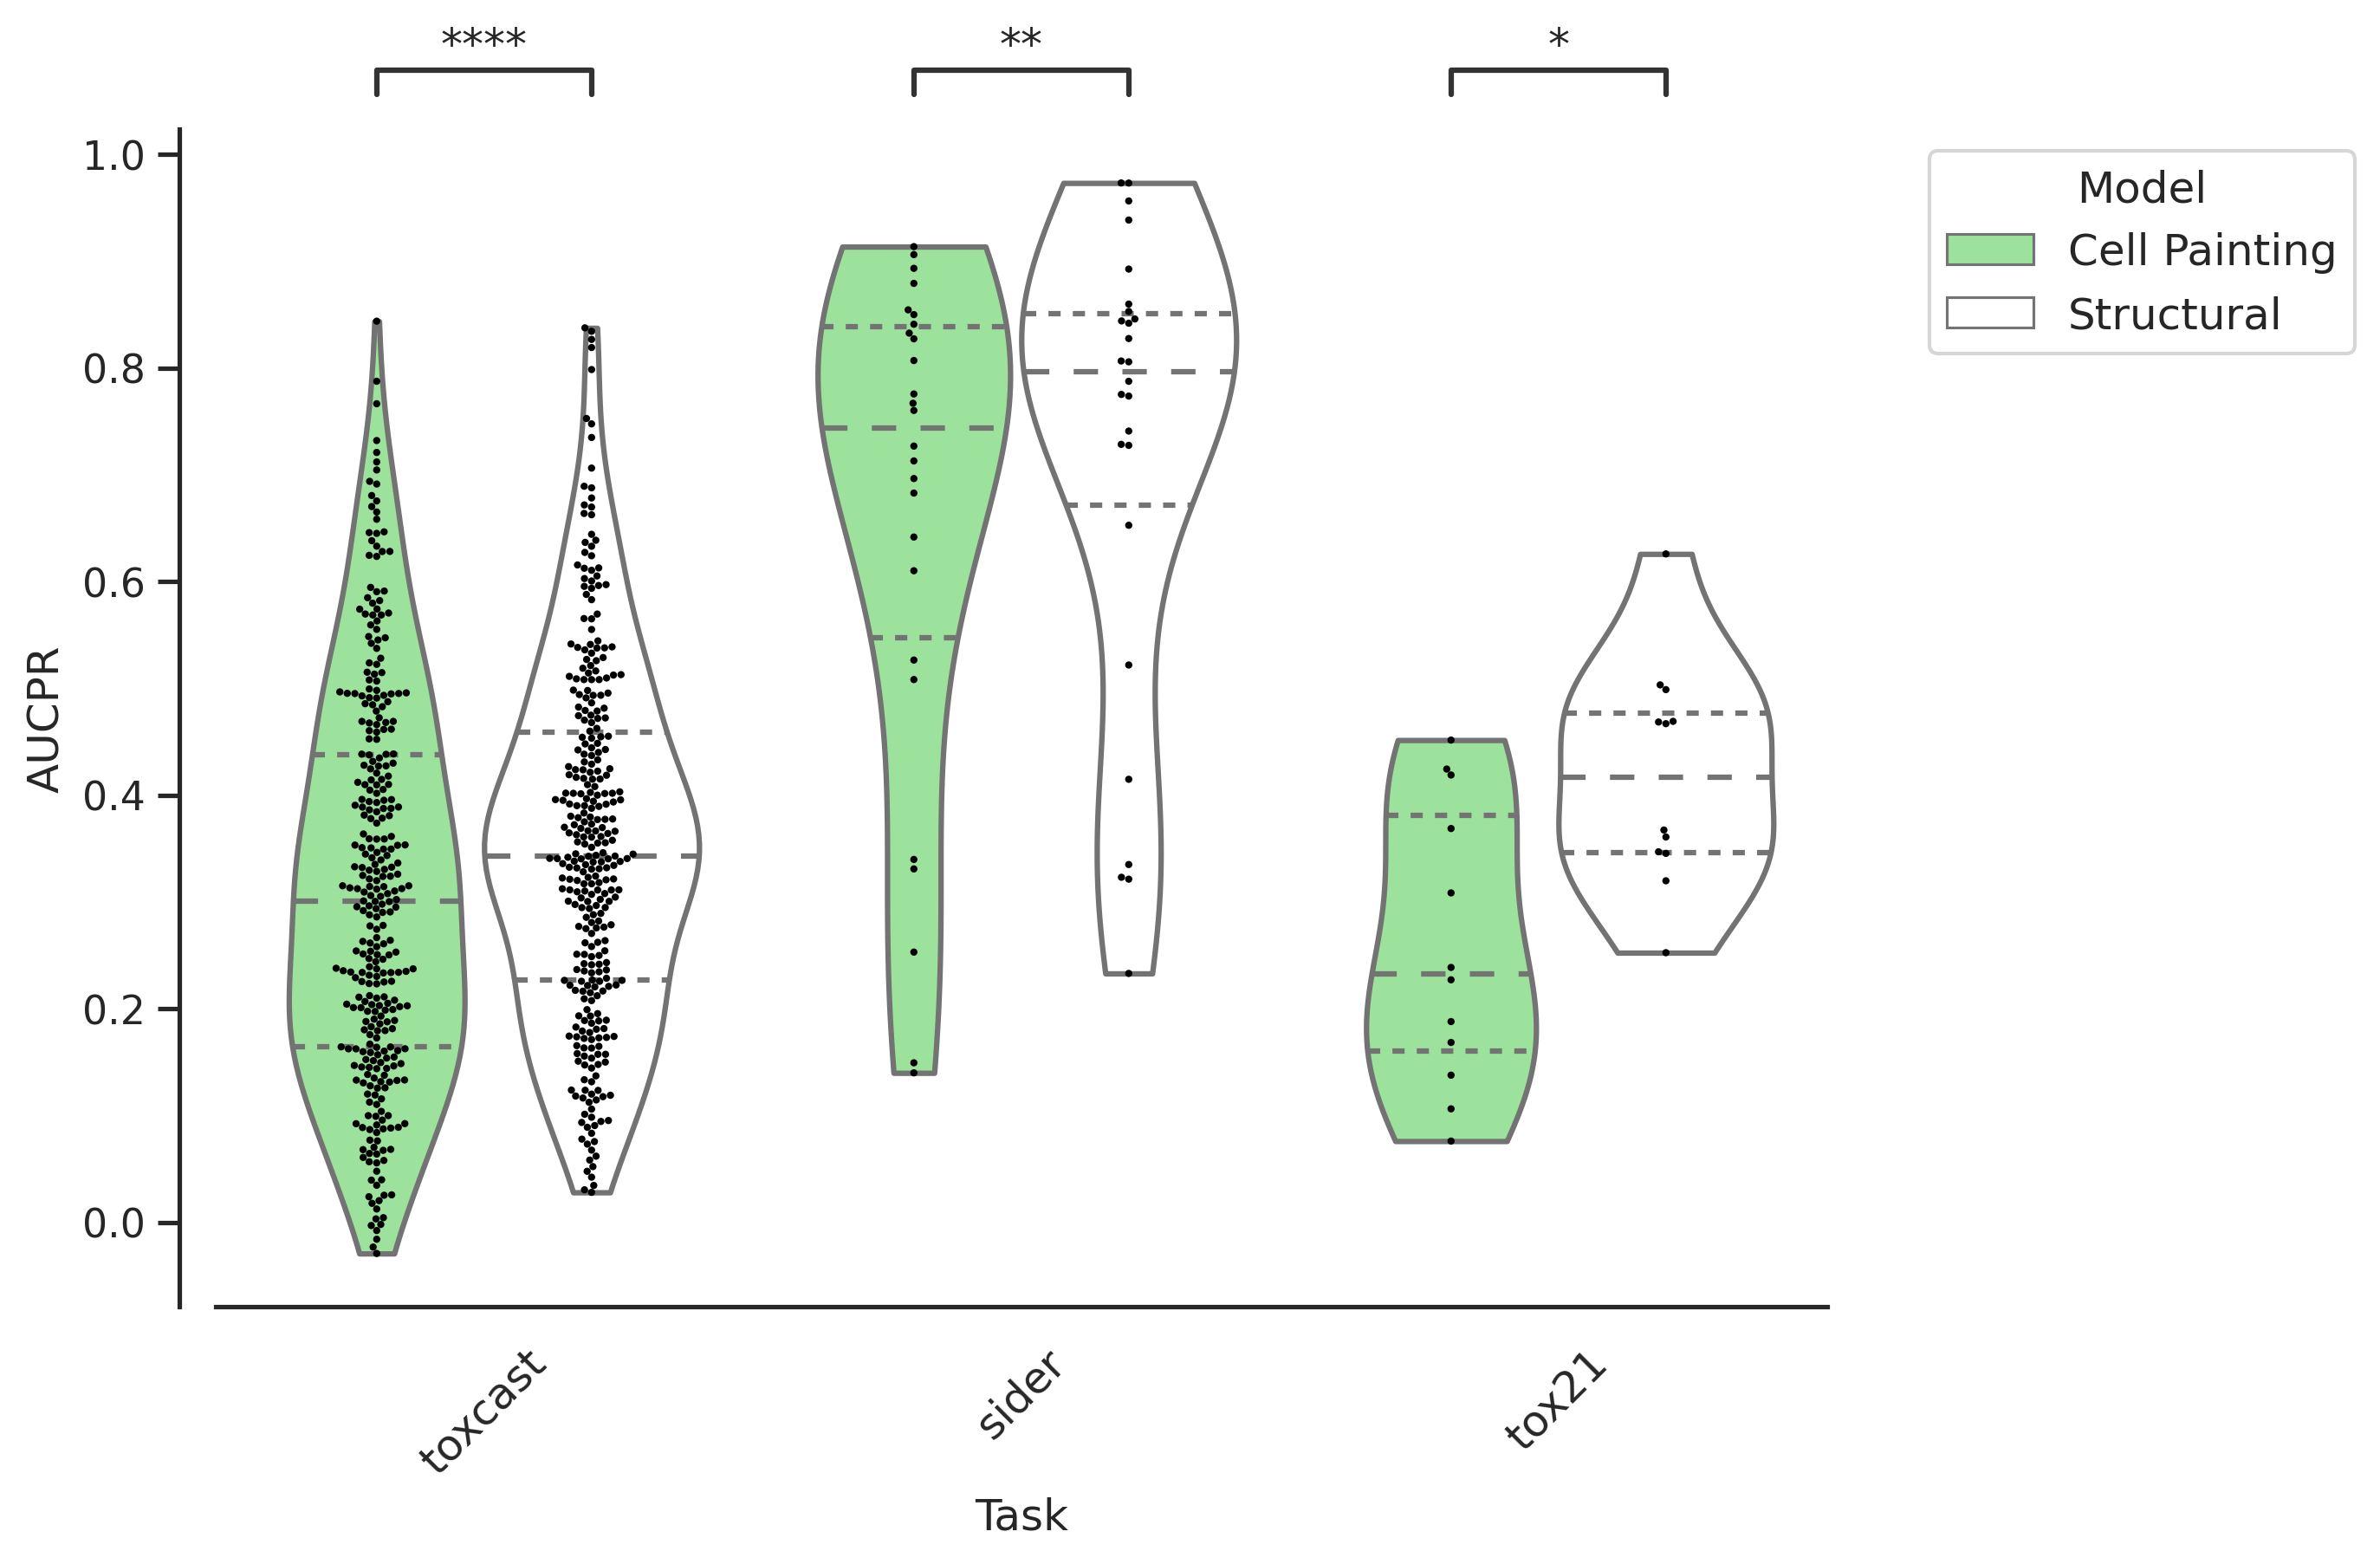

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

sider_Cell Painting v.s. sider_Structural: t-test paired samples with Bonferroni correction, P_val=5.362e-01 stat=-1.384e+00
toxcast_Cell Painting v.s. toxcast_Structural: t-test paired samples with Bonferroni correction, P_val=9.210e-45 stat=1.656e+01
tox21_Cell Painting v.s. tox21_Structural: t-test paired samples with Bonferroni correction, P_val=3.031e-02 stat=3.100e+00


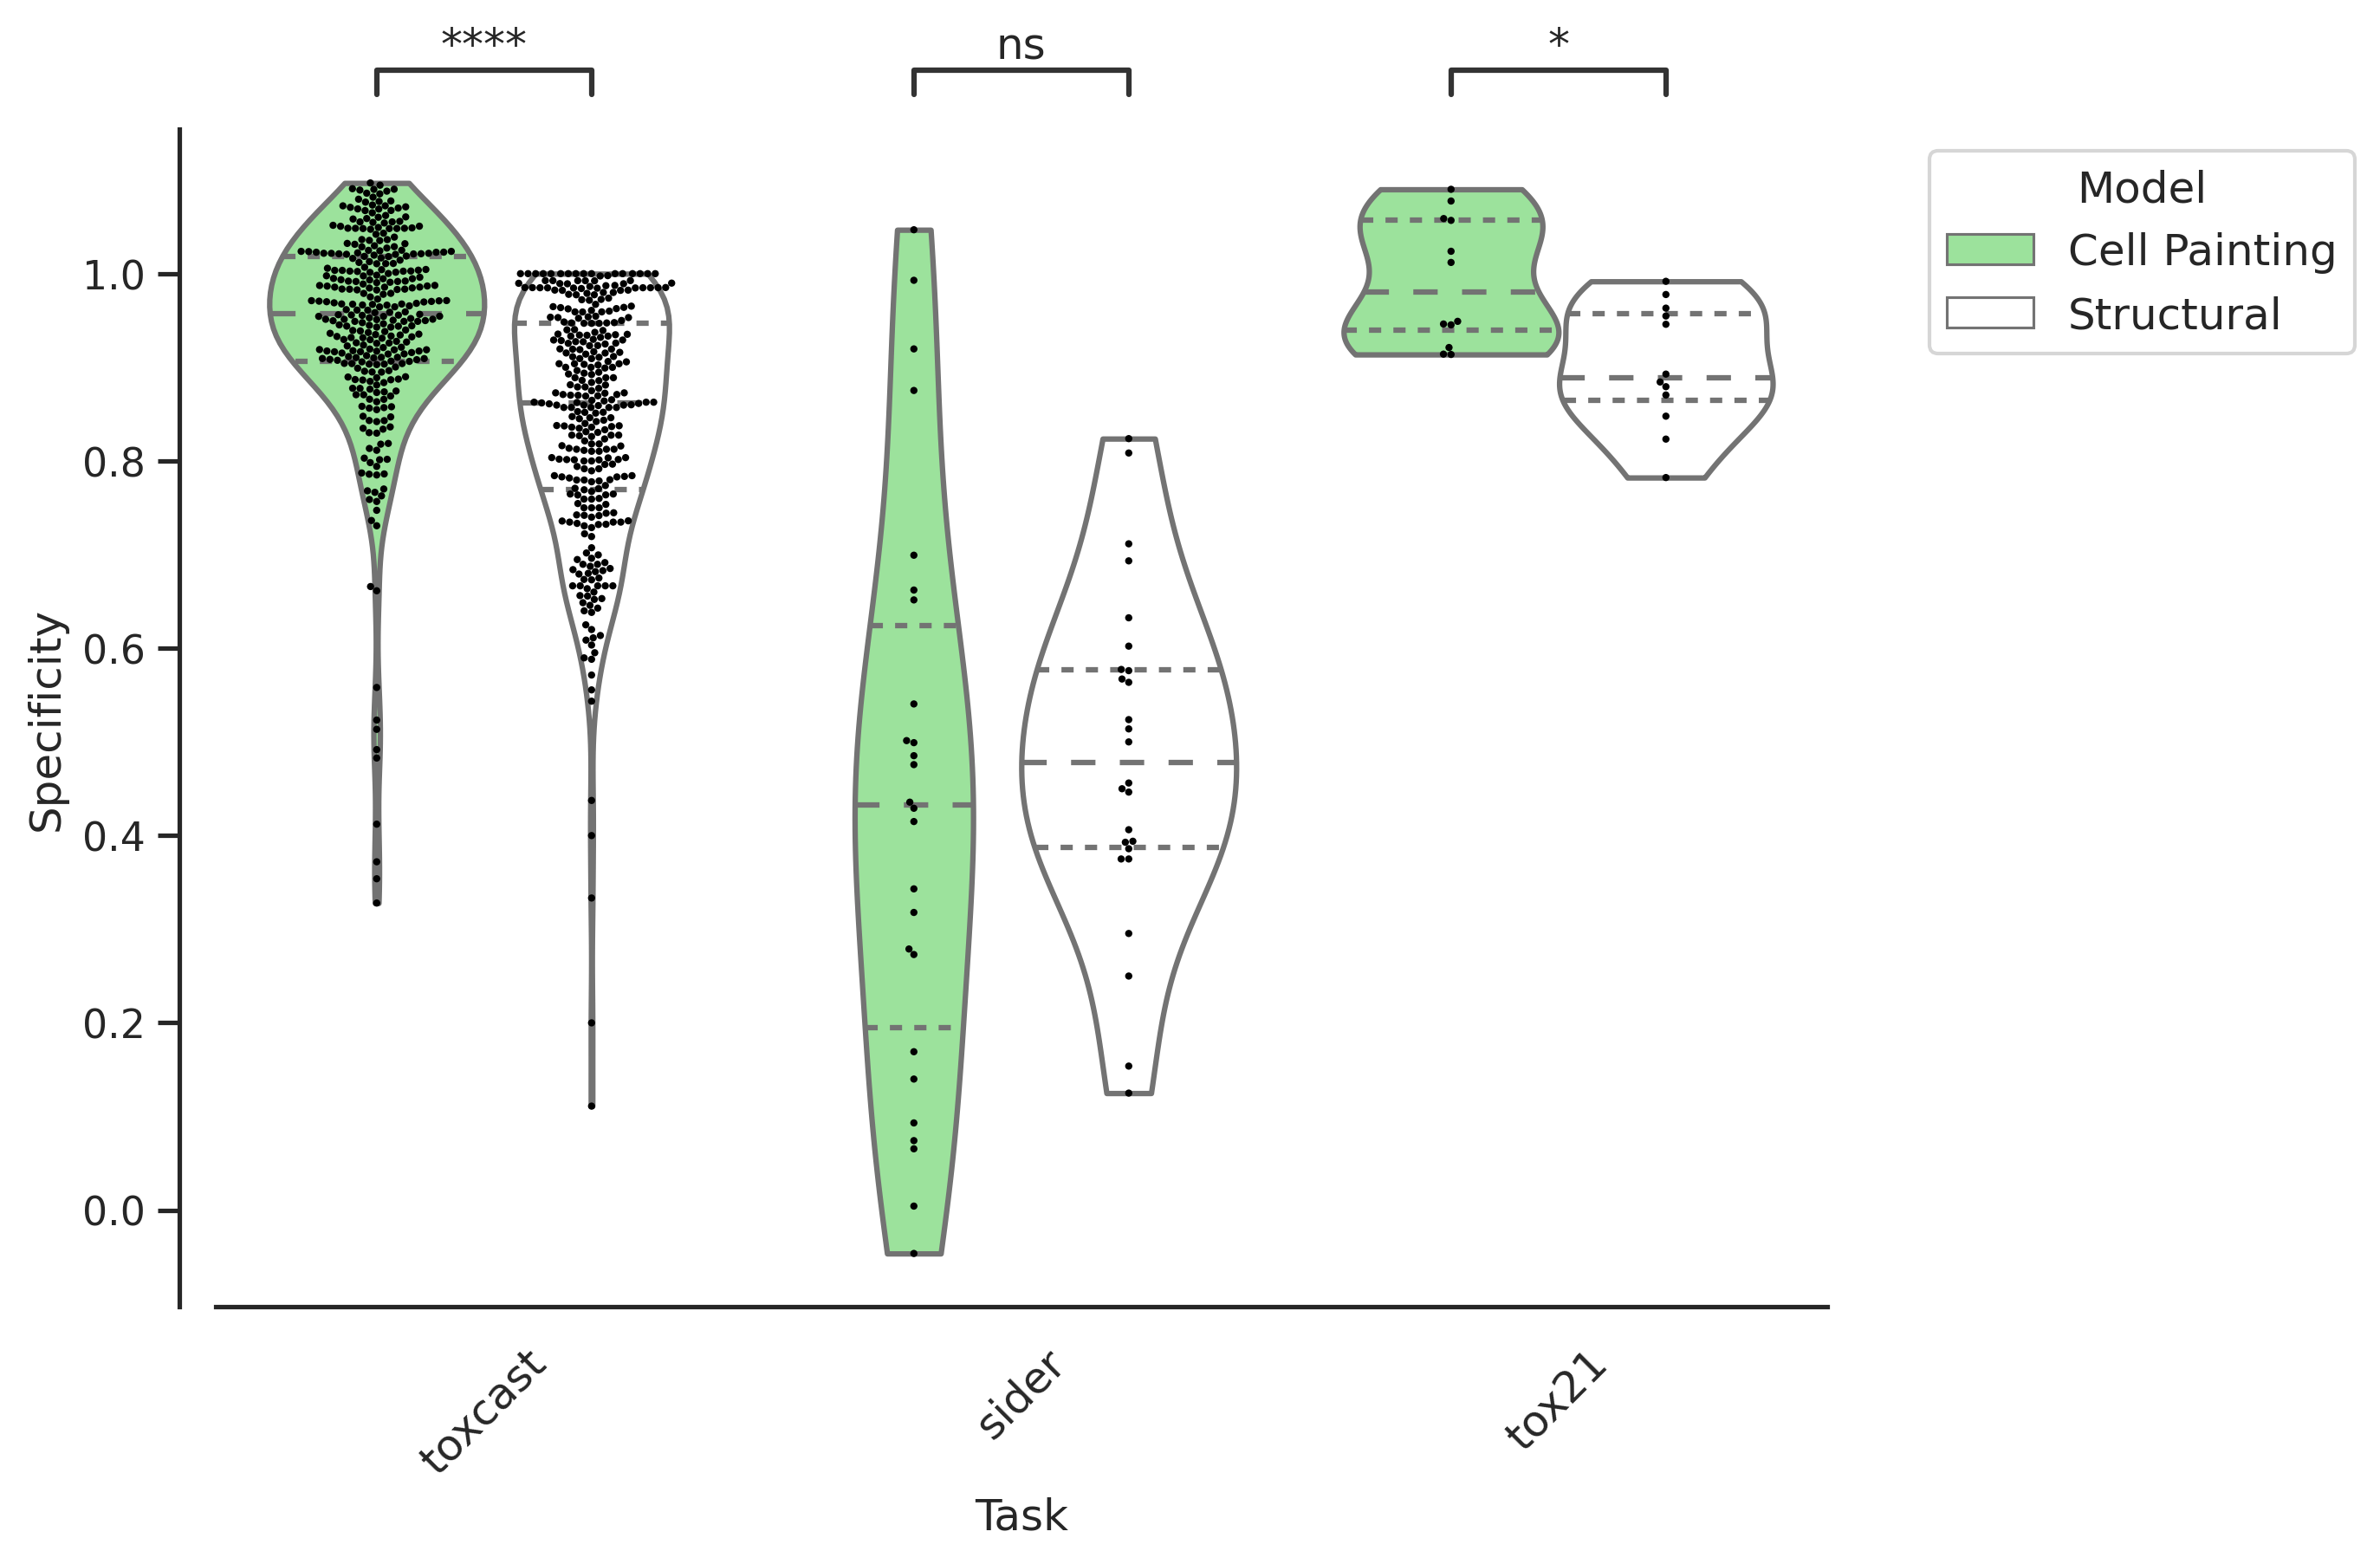

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

sider_Cell Painting v.s. sider_Structural: t-test paired samples with Bonferroni correction, P_val=3.189e-02 stat=-2.761e+00
toxcast_Cell Painting v.s. toxcast_Structural: t-test paired samples with Bonferroni correction, P_val=1.210e-59 stat=-2.034e+01
tox21_Cell Painting v.s. tox21_Structural: t-test paired samples with Bonferroni correction, P_val=2.264e-06 stat=-9.979e+00


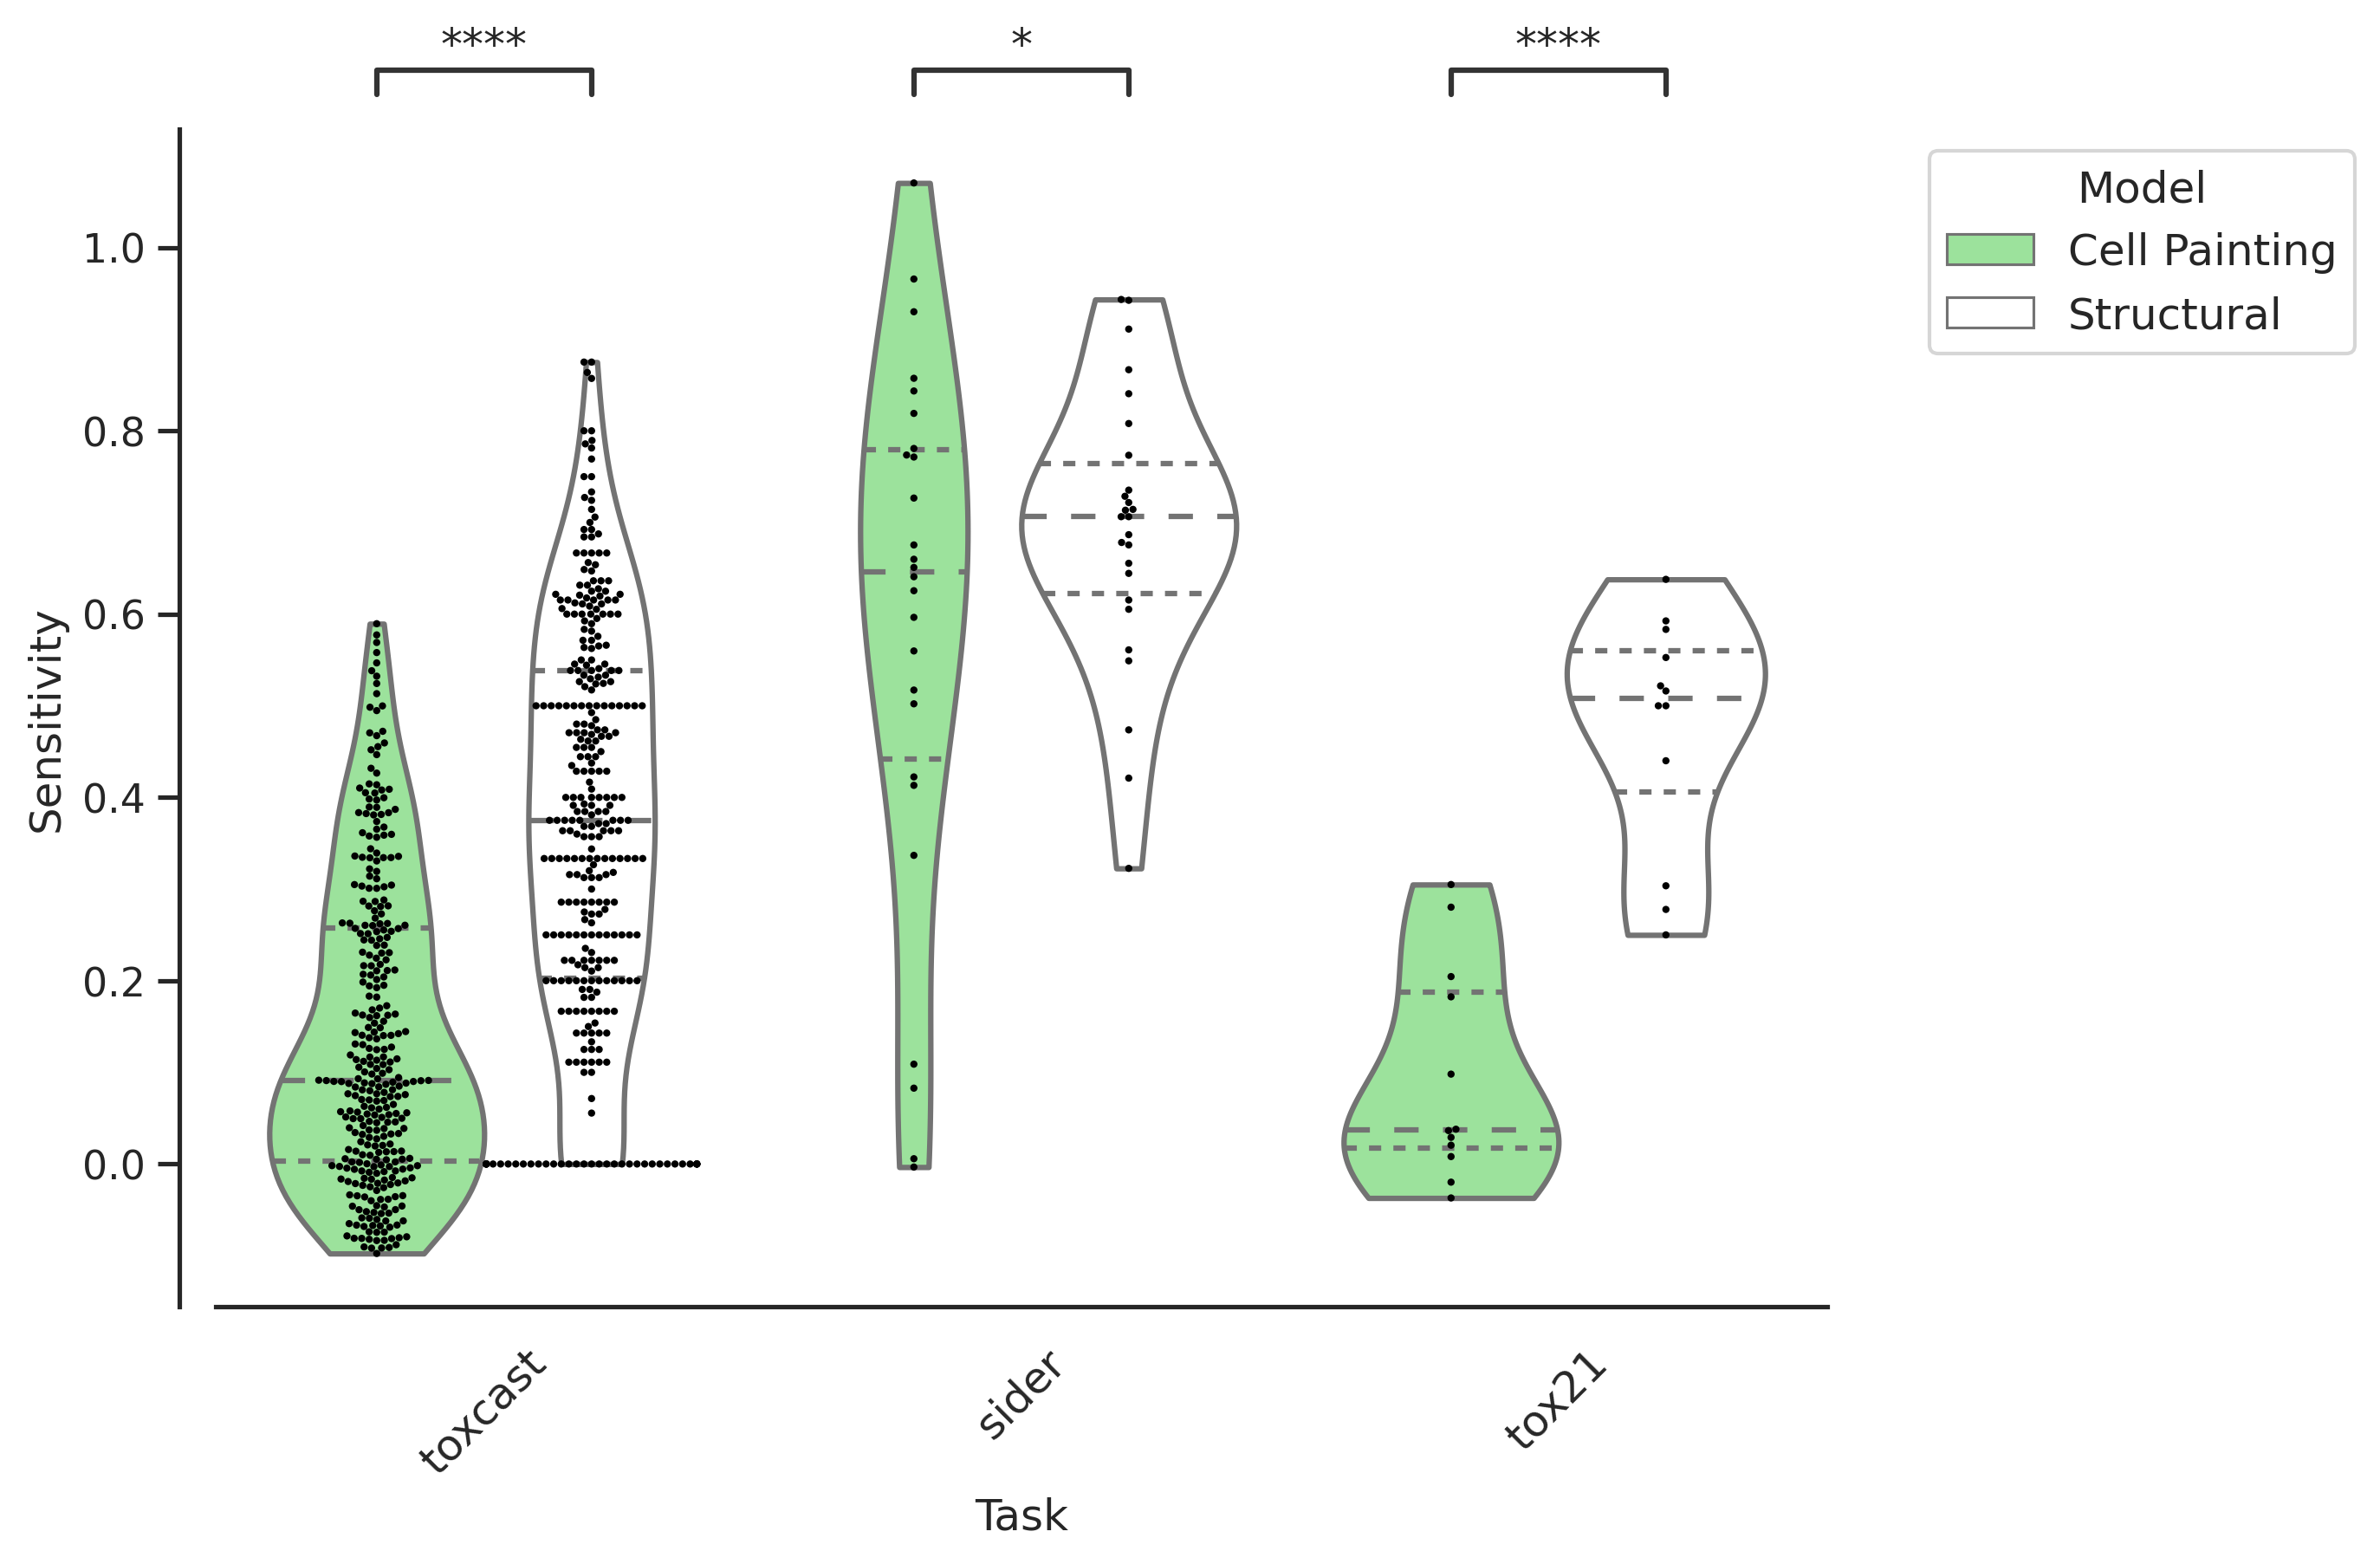

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation

# Define the list of metrics to plot
metrics_to_plot = ['BA', 'AUC', 'MCC', 'AUCPR', 'Specificity', 'Sensitivity']

# Filter the DataFrame to include only 'sider', 'toxcast', and 'tox21' tasks
tasks_to_plot = ['sider', 'toxcast', 'tox21']
results_df_violin = results_df[results_df['Task'].isin(tasks_to_plot)]

# Set a colorblind-friendly palette
colors = sns.color_palette("colorblind")

# Loop through each metric and create a violin plot for each
for metric in metrics_to_plot:
    
    # Create a figure and axis using Seaborn
    plt.figure(figsize=(8, 6), dpi=300) 
    sns.set(style="white")  # Set the style

    metric_data = results_df_violin[[f'img_Held_out_{metric}', 
                              f'str_Held_out_{metric}', 'Task']]
    
    metric_data.columns = ["Cell Painting", "Structural", "Task"]

    # Melt the DataFrame to use 'hue' for differentiation
    melted_data = metric_data.melt(id_vars='Task', 
                                   value_vars=["Cell Painting", "Structural"], 
                                   var_name='Metric', 
                                   value_name='Metric Value')
    
    # Create the violin plot
    ax = sns.violinplot(data=melted_data, x='Task', y='Metric Value', hue='Metric',
                        palette=["lightgreen", "white"], inner="quart", cut=0, alpha=0.7)  # Adjust alpha

    # Overlay the swarm plot on top of the violin plot without a legend
    sns.swarmplot(data=melted_data, x='Task', y='Metric Value', hue='Metric',
                  palette=["black", "black"], dodge=True, size=2)  # Remove legend

    # Set labels and title
    ax.set_ylabel(f'{metric}', fontsize=12)
    #ax.set_title(f'{metric} Distribution for Tasks', fontsize=12)

    # Set x-axis ticks and labels with rotation, increased fontsize
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)

    # Add statistical annotations for the comparison within each task
    add_stat_annotation(ax, data=melted_data, x='Task', y='Metric Value', hue='Metric',
                        box_pairs=[(("toxcast", "Cell Painting"), ("toxcast", "Structural")),
                                   (("sider", "Cell Painting"), ("sider", "Structural")),
                                   (("tox21", "Cell Painting"), ("tox21", "Structural"))], 
                        test='t-test_paired', text_format='star', loc='outside')

    # Create a custom legend for the violin plot
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:2], labels[:2], title='Model', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

    # Remove box line, set y-axis on the left
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_position(('outward', 10))
    ax.yaxis.set_ticks_position('left')

    # Show the plot
    plt.savefig(f'{metric}_violinswarm_comparison.png', bbox_inches='tight')
    plt.show()

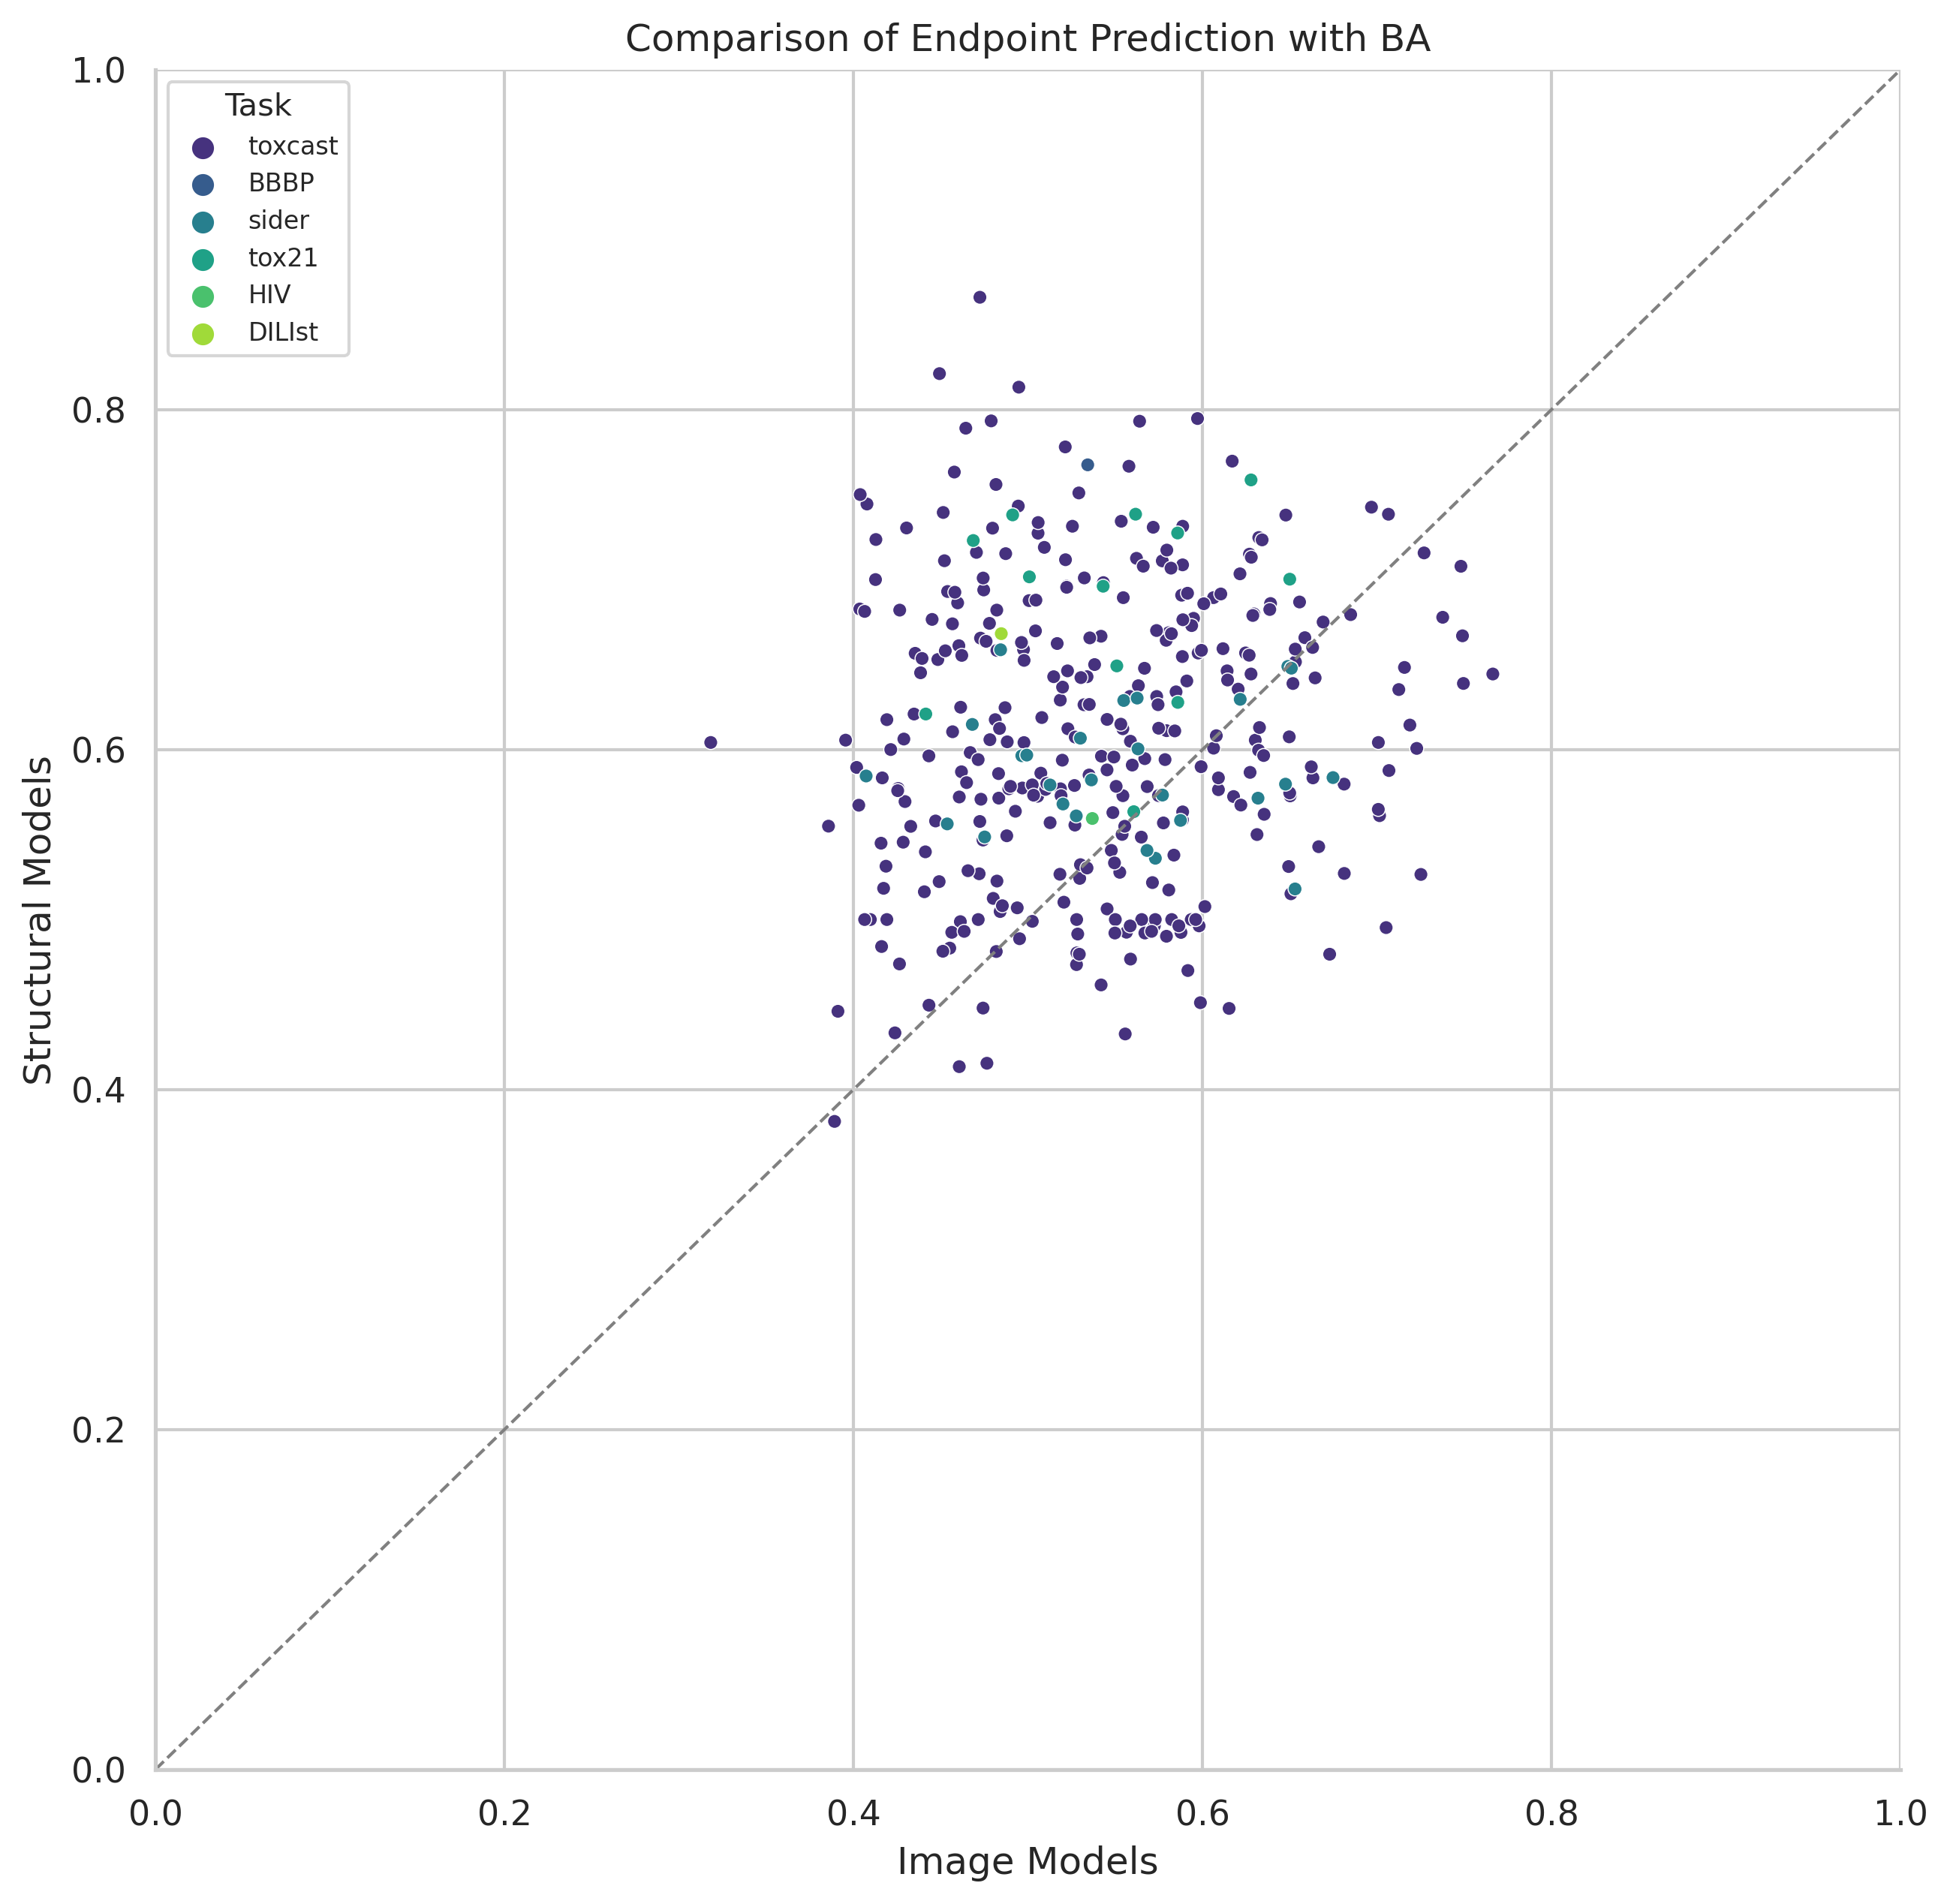

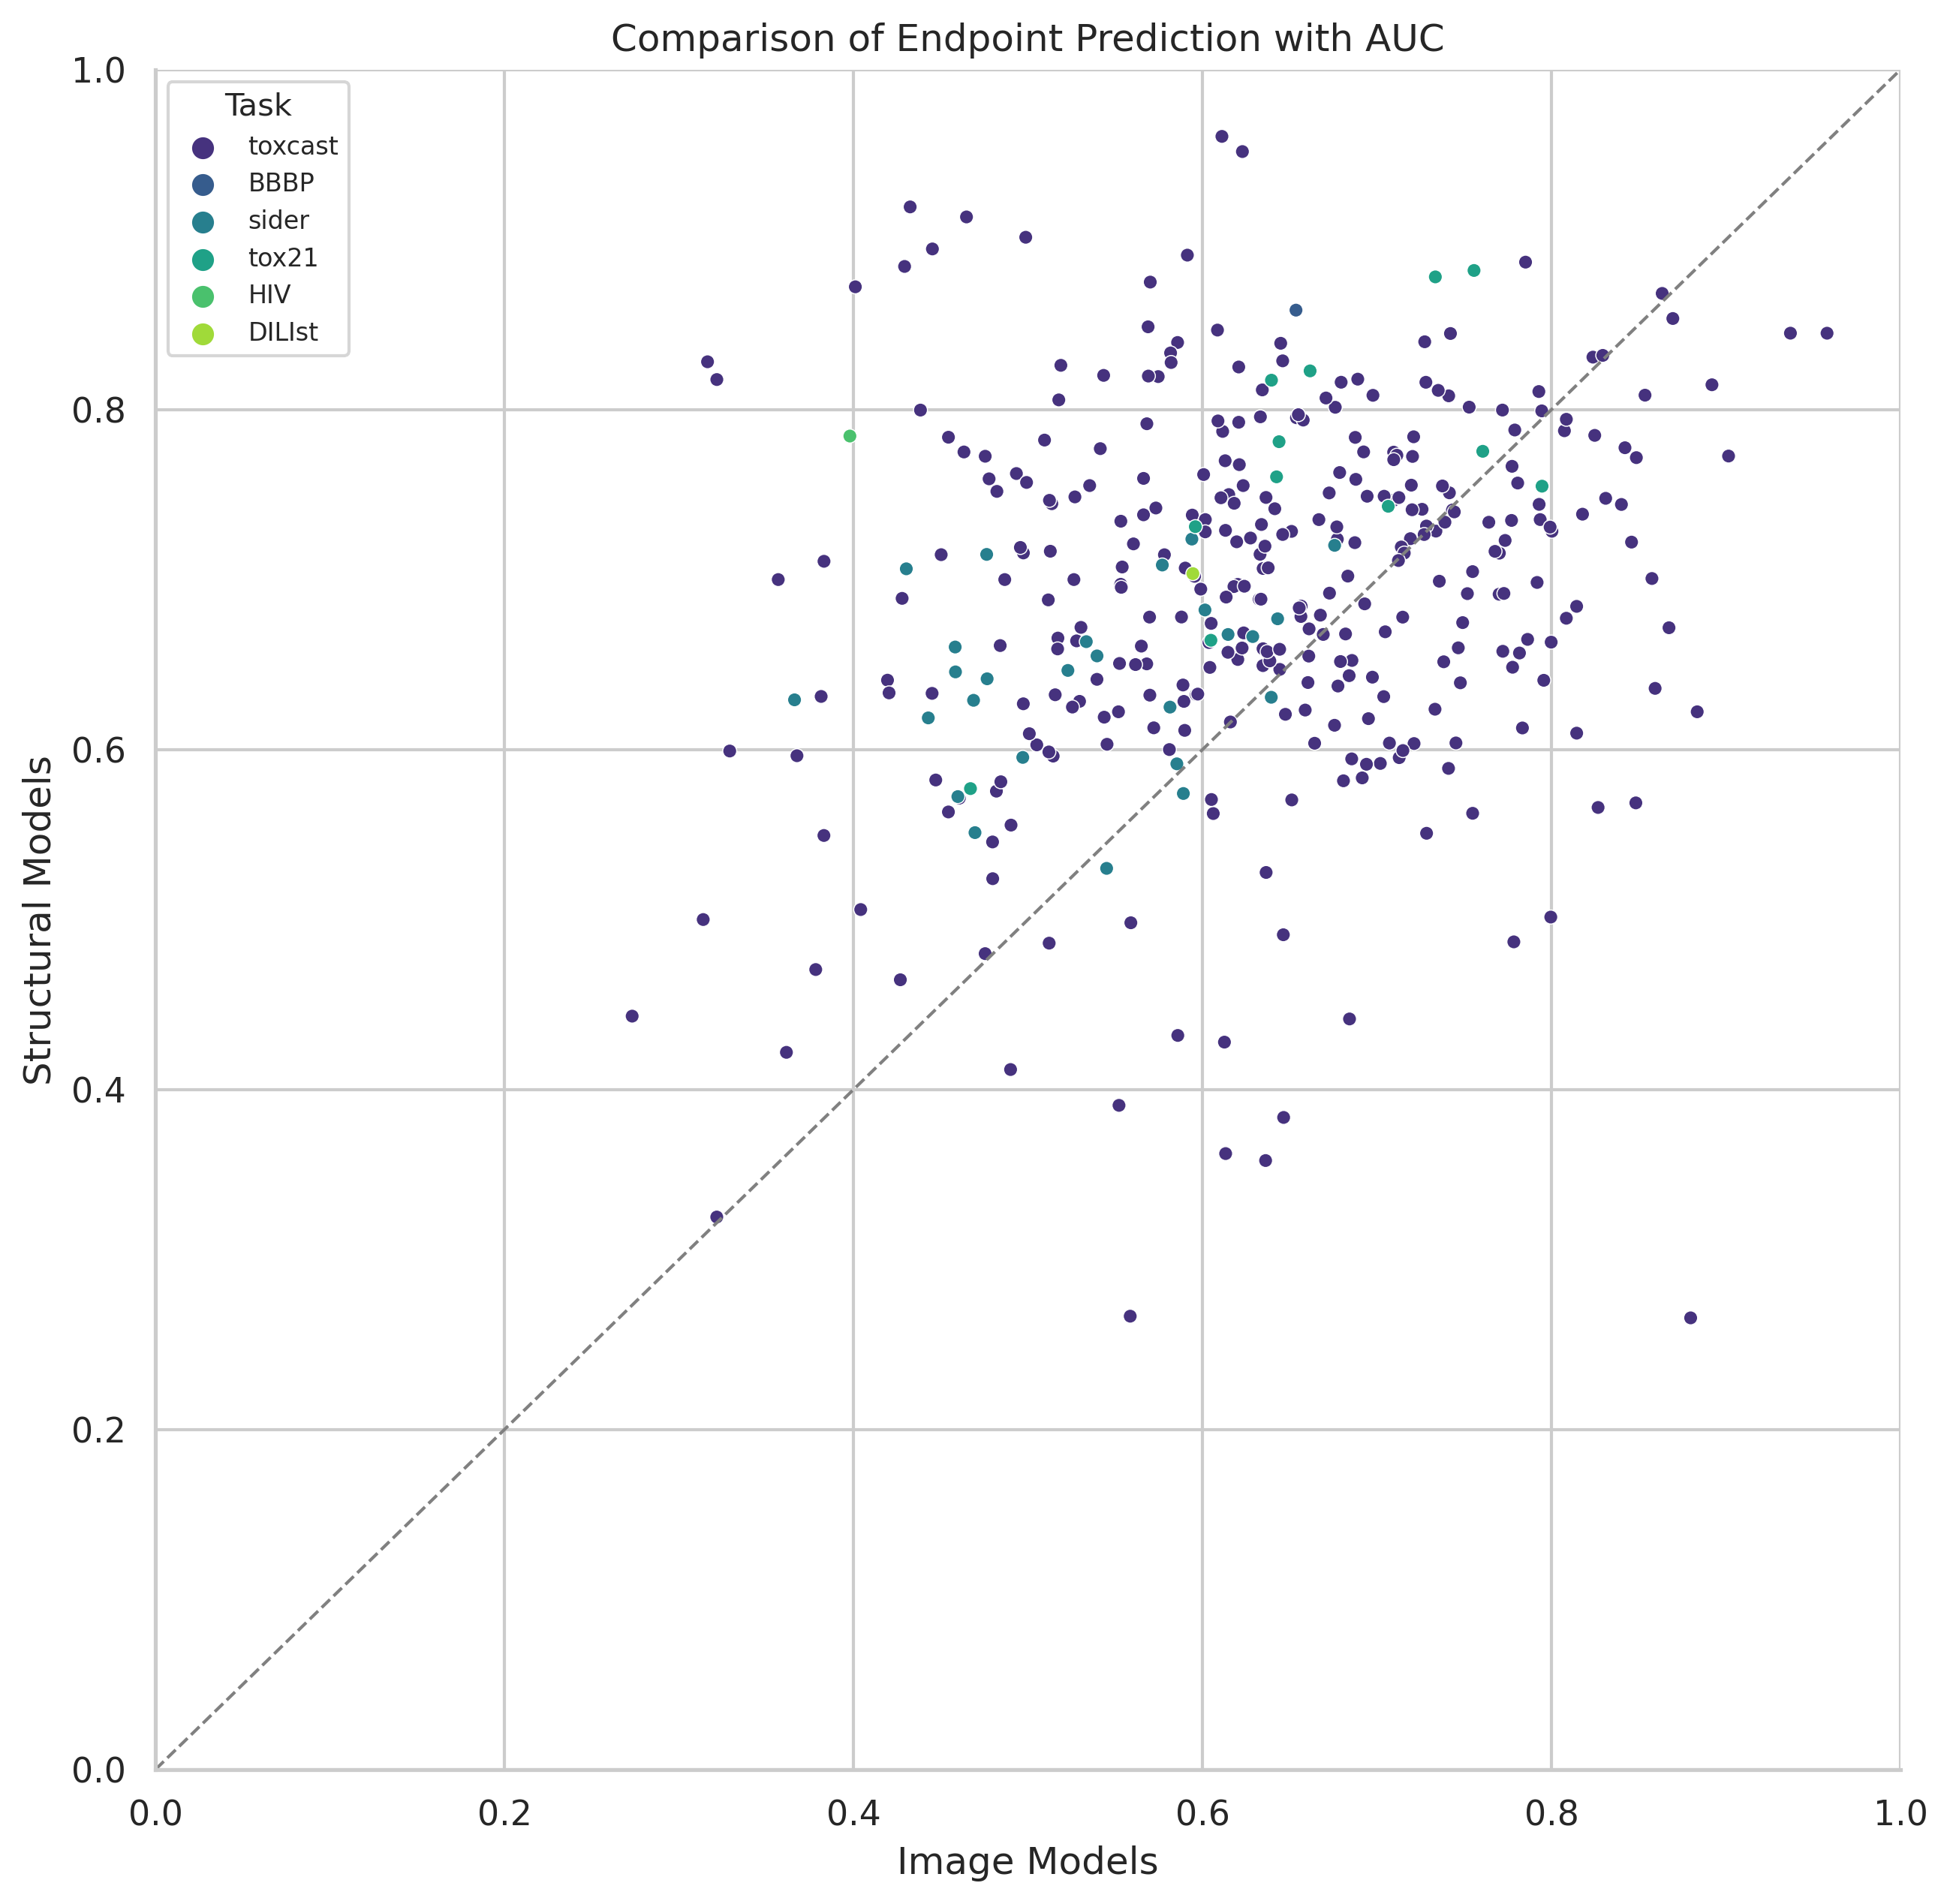

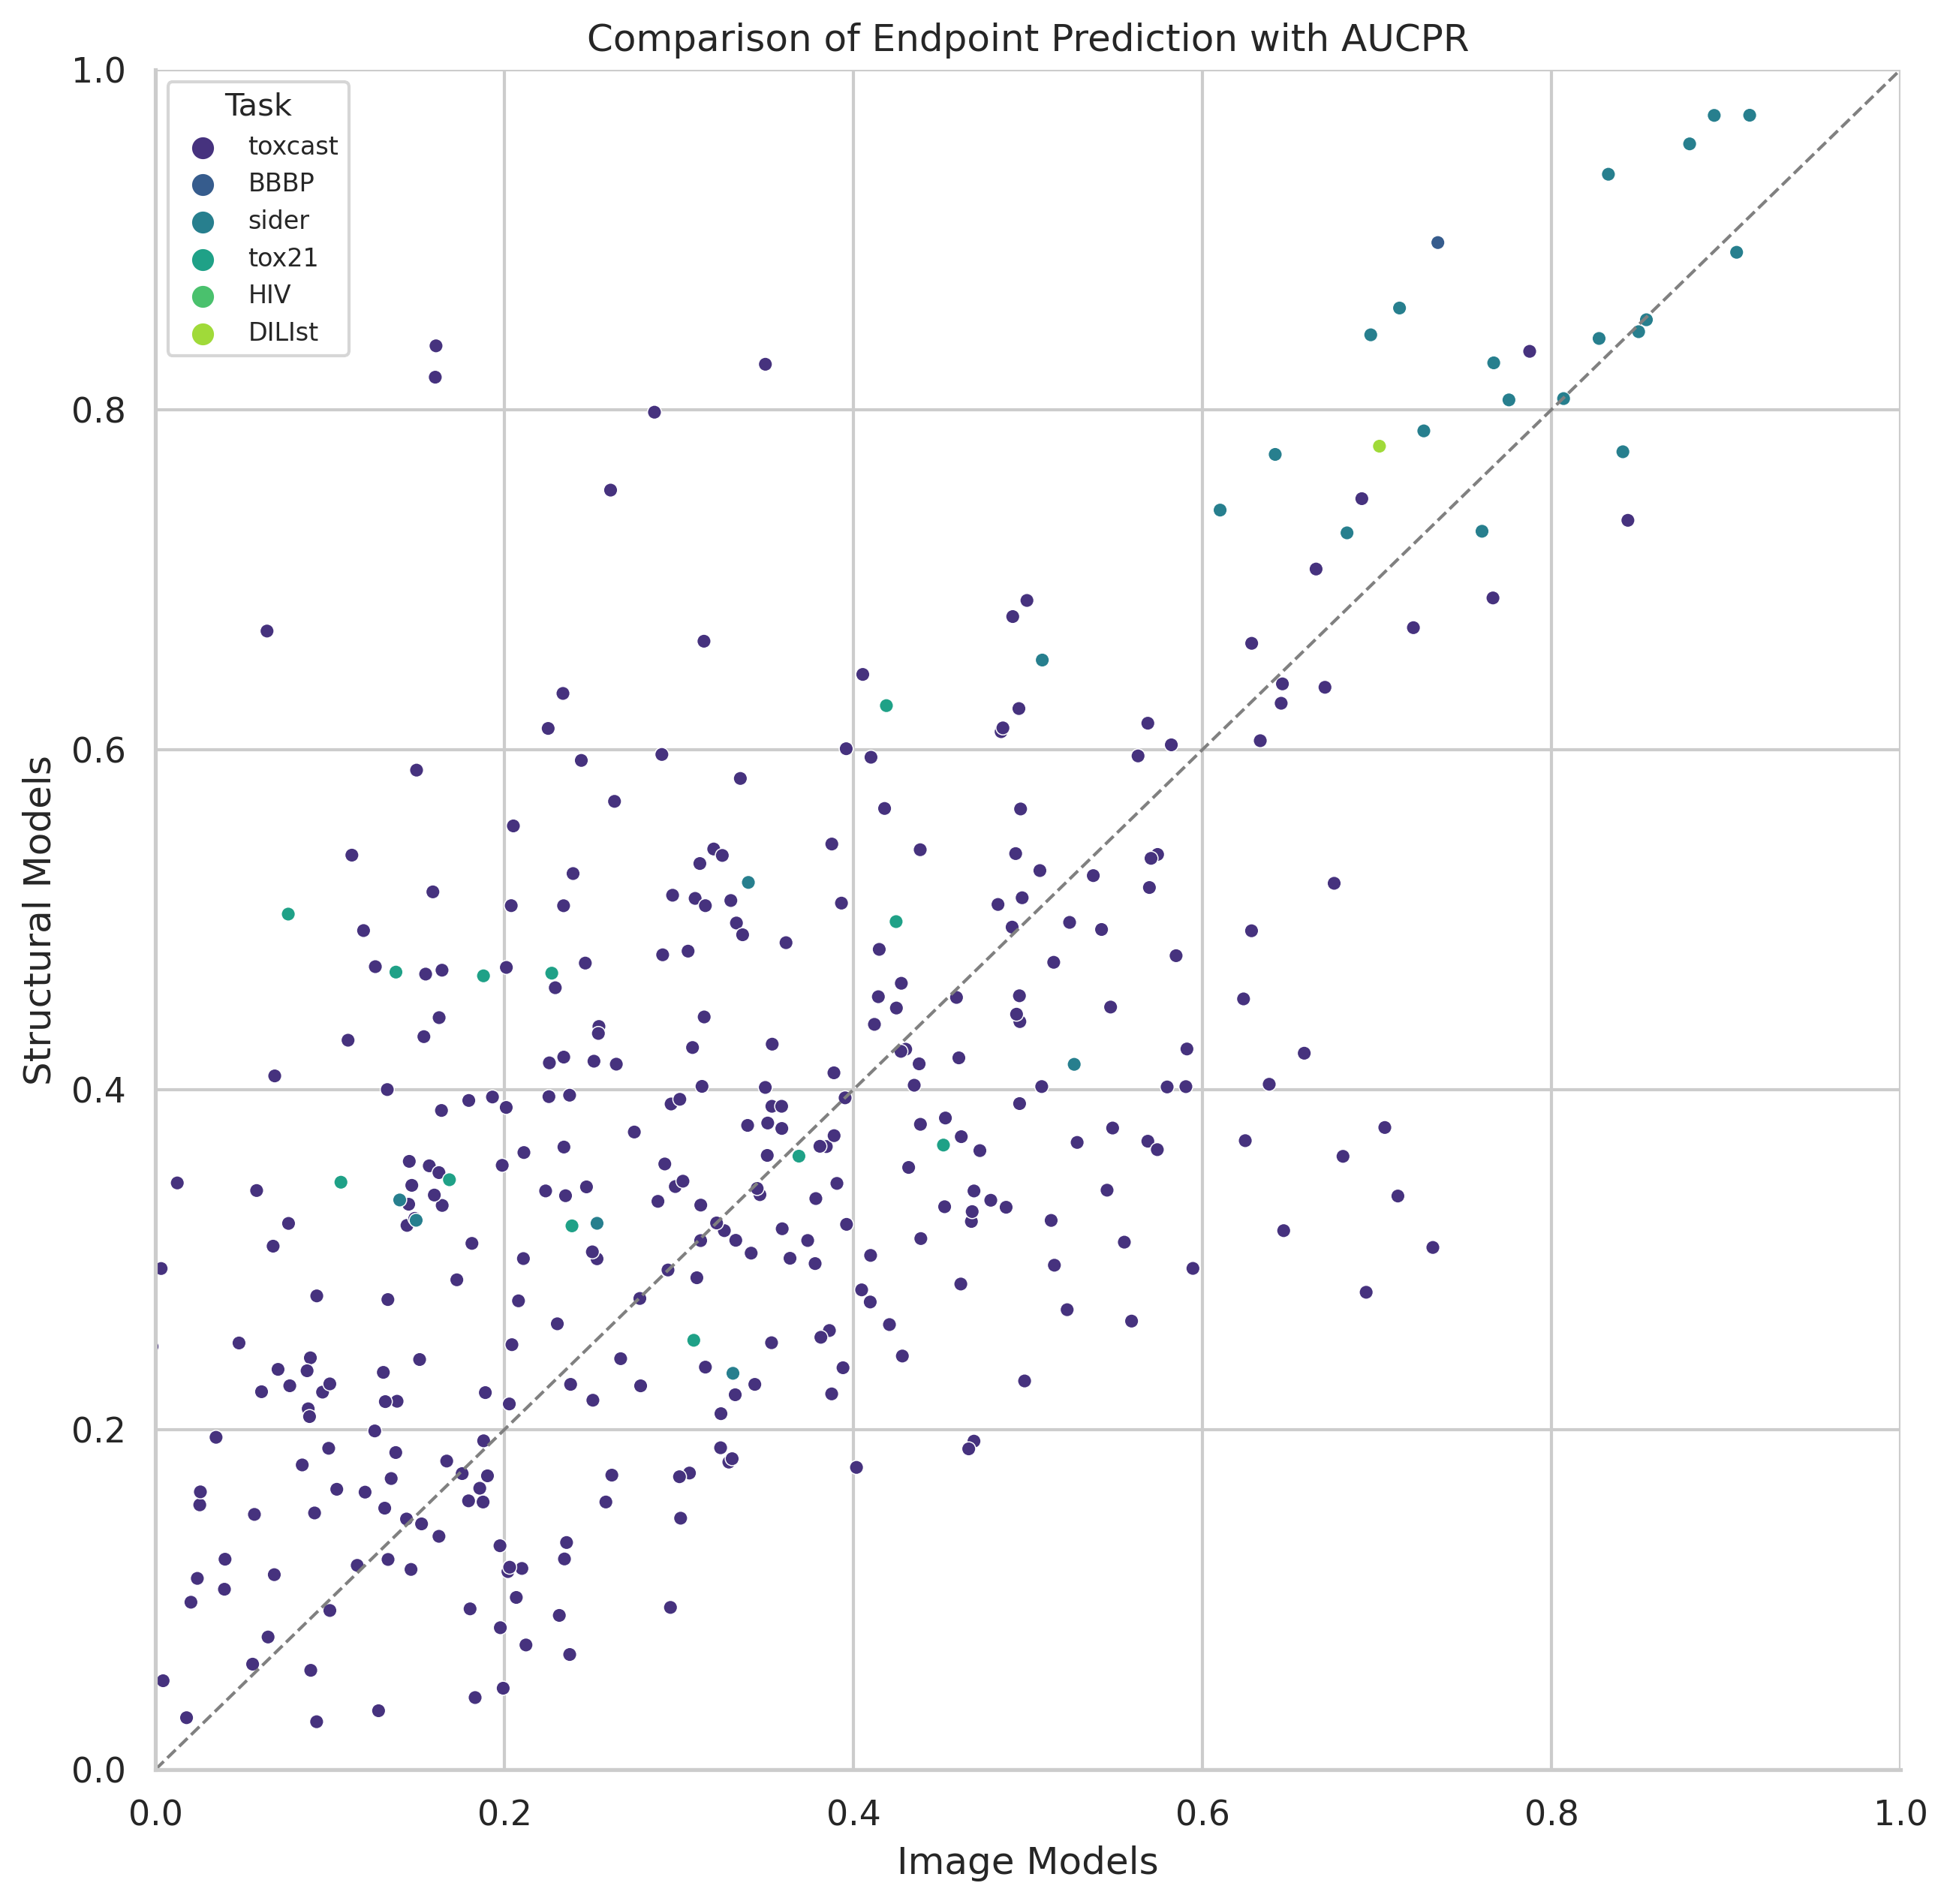

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the list of metrics to plot
metrics_to_plot = ['BA', 'AUC', 'AUCPR']

# Loop through each metric and create correlation plots for each
for metric in metrics_to_plot:

    # Create a correlation plot to compare endpoints in img vs. str space
    plt.figure(figsize=(10, 10), dpi=300)
    sns.set_style("whitegrid")

    # Scatterplot
    scatter = sns.scatterplot(
        data=results_df,
        x=f'img_Held_out_{metric}',
        y=f'str_Held_out_{metric}',
        hue='Task',
        s=20,
        palette='viridis',  # Adjust the color palette as desired
    )

    # Add a diagonal line (x=y)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=1)

    # Set x and y axis limits to start from 0 to 1
    plt.xlim(0, 1)
    plt.ylim(0, 1)

    # Remove the box
    sns.despine()


    plt.xlabel('Image Models', fontsize=12)
    plt.ylabel('Structural Models', fontsize=12)

    plt.title(f'Comparison of Endpoint Prediction with {metric}', fontsize=12)

    plt.legend(title='Task', title_fontsize=10, fontsize=8, loc='upper left')
    
    plt.savefig(f'{metric}_scatter_comparison.png', bbox_inches='tight')  
    plt.show()

In [ ]:
#Code Snippets for more plots